# **Predicting a Startup’s Acquisition Status**

# Introduction

# Problem Statement:

A start-up's financial information is given.The data contains industry trends, investment insights and individual company information.Each row contains a companies financial information and is labeled with the company status.

# Aim of the notebook:

The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# to display all columns
pd.set_option('display.max_columns', None)


In [ ]:
company = pd.read_csv("D:\Internship project\Data_companies\companies.csv")

In [ ]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [ ]:
company.shape

(196553, 44)

In [ ]:
company.head()

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  founded_at closed_at                domain  \
0              web  operating  2005-10-17       NaN      wetpaint-inc.com   
1      games_video   acquired         NaN       NaN           flektor.com   
2      games_video   acquired         NaN       NaN             there.com   
3  network_hosting  operating  2008-07-26       NaN           mywebbo.com   
4      games_video  operating  2008-07-26       NaN  themoviestreamer.com   

                  homepage_url twitter_username  \
0      http://wetpaint-inc.com  BachelrWetpaint   
1       http://www.flektor.com              NaN   
2         http://www.there.com              NaN   
3       http://www.mywebbo.com              NaN   
4  http://themoviestreamer.com              NaN   

                                            logo_url  logo_width  logo_height  \
0  http://s3.amazonaws.com/crunchbase_prod_assets...       401.0         54.0   
1  http://s3.amazonaws.com/crunchbase_prod_assets...       186.0         85.0   
2  http://s3.amazonaws.com/crunchbase_prod_assets...       107.0         34.0   
3                                                NaN         NaN          NaN   
4  http://s3.amazonaws.com/crunchbase_prod_assets...       200.0         74.0   

  short_description                  description  \
0               NaN  Technology Platform Company   
1               NaN                          NaN   
2               NaN                          NaN   
3               NaN                          NaN   
4               NaN                          NaN   

                                            overview  \
0  Wetpaint is a technology platform company that...   
1  Flektor is a rich-media mash-up platform that ...   
2  There.com is an online virtual world where any...   
3  BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...   
4  This company shows free movies online on their...   

                                            tag_list country_code state_code  \
0  wiki, seattle, elowitz, media-industry, media-...          USA         WA   
1                              flektor, photo, video          USA         CA   
2                         virtualworld, there, teens          USA         CA   
3  social-network, new, website, web, friends, ch...          NaN        NaN   
4  watch, full-length, moives, online, for, free,...          NaN        NaN   

          city       region first_investment_at last_investment_at  \
0      Seattle      Seattle                 NaN                NaN   
1  Culver City  Los Angeles                 NaN                NaN   
2    San Mateo       SF Bay                 NaN                NaN   
3          NaN      unknown                 NaN                NaN   
4          NaN      unknown                 NaN                NaN   

   investment_rounds  invested_companies first_funding_at last_funding_at  \
0                NaN                 NaN       2005-10-01      2008-05-19   
1                NaN                 NaN              NaN             NaN   
2                NaN                 NaN              NaN             NaN   
3                NaN                 NaN              NaN             NaN

A. Data Cleaning
Delete irrelevant & redundant information
Remove noise or unreliable data (missing values and outliers)

1. Delete irrelevant and redundant information

a. Delete 'region','city','state_code' as they provide too much of granularity.
b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',
'invested_companies' as they are irrelevant features.
d. Delete those which has more than 98% of null values.

In [ ]:
company.drop(['region','city','state_code'], axis=1,inplace=True)
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [ ]:
# Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
relationships          34.029498
category_code          37.326828
milestones             53.346426
last_milestone_at      53.346426
first_milestone_at     53.346426
founded_at             53.586564
country_code           55.233448
lat                    57.338733
lng                    57.338733
funding_rounds         83.868473
last_funding_at        83.970227
first_funding_at       83.970227
funding_total_usd      85.818583
closed_at              98.667026
investment_rounds      98.681780
last_investment_at     98.685851
first_investment_at    98.685851
ROI                    99.630634
dtype: float64

In [ ]:
# Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

In [ ]:
company.shape

(196553, 15)

In [ ]:

company.isna().sum()

category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
relationships          66886
lat                   112701
lng                   112701
dtype: int64

In [ ]:
# Drop missing values
company.dropna(subset=['category_code', 'status', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships','lat', 'lng'], inplace=True)

In [ ]:
company.shape

(12327, 15)

**Outliers**

<AxesSubplot:xlabel='funding_total_usd'>

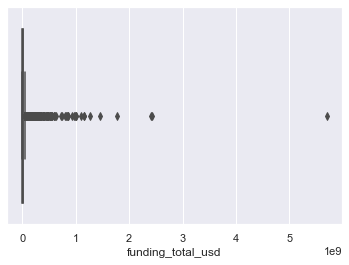

In [ ]:
# 'funding_total_usd'
sns.boxplot(x=company["funding_total_usd"])

In [ ]:
# For funding_total_usd

Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")

# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(f"Outliers{funding_total_usd_outliers.shape}")

# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)

IQR of funding_total_usd is: 15846000.0

funding_total_usd
lower limit is: -23115000.0
upper limit is: 40269000.0

Outliers(1423, 15)


<AxesSubplot:xlabel='funding_total_usd'>

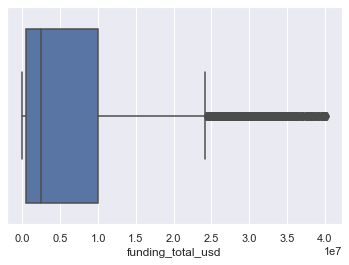

In [ ]:
# sns.distplot(company['funding_total_usd'])
# plt.show()
sns.boxplot(x=company["funding_total_usd"])

<AxesSubplot:xlabel='relationships'>

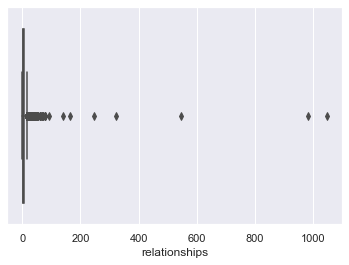

In [ ]:
sns.boxplot(x=company["relationships"])

In [ ]:

# For relationships

Q1_rel = company.relationships.quantile(0.25)
Q3_rel = company.relationships.quantile(0.75)
Q1_rel, Q3_rel
IQR_rel = Q3_rel - Q1_rel
print(f"IQR of relationships is: {IQR_rel}\n")

# For relationships
lower_limit_rel = Q1_rel - 1.5*IQR_rel
upper_limit_rel = Q3_rel + 1.5*IQR_rel
print("relationships")
print(f"lower limit is: {lower_limit_rel}")
print(f"upper limit is: {upper_limit_rel}\n")

# For relationships
relationships_outliers=company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)]
print(f"Outliers{relationships_outliers.shape}")

# For relationships
company.drop(company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)].index,inplace=True)

IQR of relationships is: 6.0

relationships
lower limit is: -7.0
upper limit is: 17.0

Outliers(499, 15)


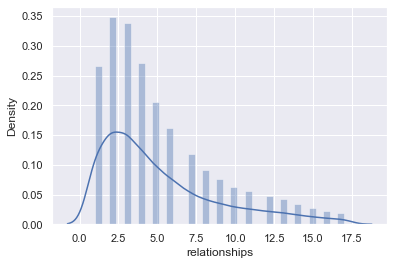

<AxesSubplot:xlabel='relationships'>

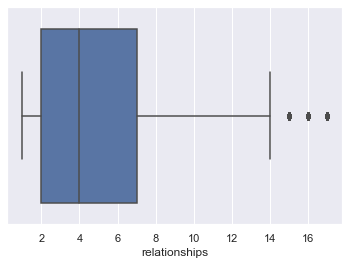

In [ ]:
sns.distplot(company['relationships'])
plt.show()
sns.boxplot(x=company["relationships"])

<AxesSubplot:xlabel='funding_rounds'>

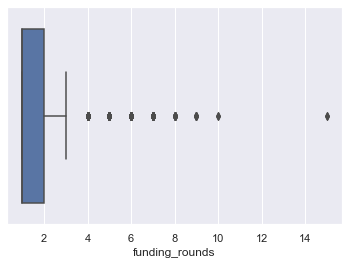

In [ ]:
sns.boxplot(x=company["funding_rounds"])

In [ ]:
Q1_funding_rounds = company['funding_rounds'].quantile(0.25)
Q3_funding_rounds = company['funding_rounds'].quantile(0.75)

IQR_funding_rounds = Q3_funding_rounds - Q1_funding_rounds

lower_funding_rounds = Q1_funding_rounds - 1.5 * IQR_funding_rounds
upper_funding_rounds = Q3_funding_rounds + 1.5 * IQR_funding_rounds

funding_rounds_outliers=company[(company.funding_rounds<lower_funding_rounds)|(company.funding_rounds>upper_funding_rounds)]
print(f"Outliers{funding_rounds_outliers.shape}")
company.drop(company[(company.funding_rounds<lower_funding_rounds)|(company.funding_rounds>upper_funding_rounds)].index,inplace=True)

Outliers(845, 15)


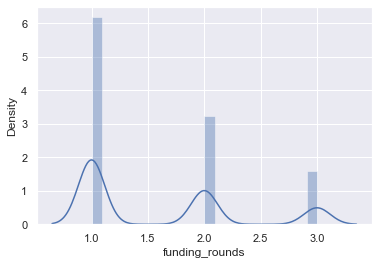

<AxesSubplot:xlabel='funding_rounds'>

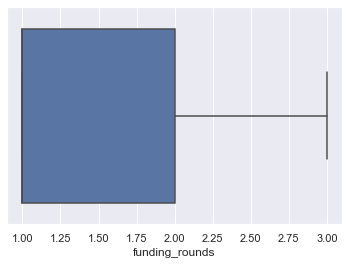

In [ ]:
sns.distplot(company['funding_rounds'])
plt.show()
sns.boxplot(x=company["funding_rounds"])

In [ ]:
company.describe()

funding_rounds  funding_total_usd   milestones  relationships  \
count     9560.000000       9.560000e+03  9560.000000    9560.000000   
mean         1.582113       5.688322e+06     1.581485       4.876987   
std          0.728964       8.174239e+06     0.793617       3.609123   
min          1.000000       2.910000e+02     1.000000       1.000000   
25%          1.000000       4.138870e+05     1.000000       2.000000   
50%          1.000000       2.000000e+06     1.000000       4.000000   
75%          2.000000       7.600000e+06     2.000000       6.000000   
max          3.000000       4.019970e+07     7.000000      17.000000   

               lat          lng  
count  9560.000000  9560.000000  
mean     38.476941   -64.936107  
std      13.761459    63.824114  
min     -42.883611  -158.056896  
25%      37.334406  -121.886329  
50%      39.103118   -80.124767  
75%      43.653226    -2.010108  
max      70.919200   174.776236

In [ ]:
# For founded_at
company['founded_at'] = pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

#For closed at
company['closed_at'] = pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at'] = pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at'] = pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# first_milestone_at
company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year

# last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [ ]:
# 1. category_code
print('Total number of unique categories are:',company.category_code.nunique())
company.category_code.unique()

Total number of unique categories are: 42


array(['web', 'cleantech', 'mobile', 'enterprise', 'games_video',
       'analytics', 'news', 'software', 'other', 'security',
       'advertising', 'photo_video', 'finance', 'travel', 'ecommerce',
       'transportation', 'hospitality', 'biotech', 'health', 'education',
       'medical', 'network_hosting', 'nonprofit', 'search', 'sports',
       'fashion', 'messaging', 'public_relations', 'consulting', 'social',
       'music', 'hardware', 'real_estate', 'automotive', 'pets',
       'manufacturing', 'semiconductor', 'legal', 'design', 'local',
       'nanotech', 'government'], dtype=object)

In [ ]:
company.category_code.value_counts()

software            1597
web                 1129
mobile               887
enterprise           696
ecommerce            613
advertising          533
games_video          494
biotech              298
analytics            294
social               289
hardware             221
education            199
finance              180
cleantech            152
other                151
network_hosting      144
health               142
security             141
public_relations     130
search               129
travel               110
messaging            106
consulting            92
medical               88
fashion               87
semiconductor         81
news                  79
hospitality           74
music                 73
photo_video           63
real_estate           57
sports                47
manufacturing         41
nonprofit             32
automotive            25
transportation        22
design                21
legal                 19
pets                   9
local                  7


In [ ]:
# category_encoding
category_others_index = company.category_code.value_counts()[14:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [ ]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


other          1978
software       1597
web            1129
mobile          887
enterprise      696
ecommerce       613
advertising     533
games_video     494
biotech         298
analytics       294
social          289
hardware        221
education       199
finance         180
cleantech       152
Name: category_code, dtype: int64

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# asoa


In [ ]:
print('Total number of unique categories are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique categories are: 91


array(['USA', 'AUS', 'SWE', 'DEU', 'JPN', 'GBR', 'RUS', 'ISL', 'CAN',
       'CHE', 'ISR', 'TUR', 'FRA', 'ZAF', 'MYS', 'ESP', 'IND', 'KOR',
       'DNK', 'IRL', 'CHN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'NLD',
       'UKR', 'MEX', 'IDN', 'POL', 'SVK', 'EGY', 'NZL', 'NGA', 'CZE',
       'FIN', 'HRV', 'ITA', 'HUN', 'HKG', 'CYP', 'GRC', 'NPL', 'ARG',
       'BRA', 'BGR', 'CHL', 'LUX', 'ARE', 'THA', 'AUT', 'BHS', 'GEO',
       'NOR', 'PAN', 'LBN', 'BGD', 'URY', 'GTM', 'LTU', 'COL', 'TWN',
       'ANT', 'MAR', 'CRI', 'BLR', 'SVN', 'VEN', 'VNM', 'ALB', 'LVA',
       'JOR', 'PER', 'DOM', 'KEN', 'UGA', 'MMR', 'ROM', 'BHR', 'AZE',
       'PAK', 'CYM', 'UMI', 'GIB', 'CMR', 'SAU', 'GHA', 'CSS', 'FST',
       'BRB'], dtype=object)

In [ ]:
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [ ]:
print('Total number of unique countries are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique countries are: 10


array(['USA', 'AUS', 'other', 'DEU', 'GBR', 'CAN', 'ISR', 'FRA', 'ESP',
       'IND'], dtype=object)

Create new variables¶

Create new feature isClosed from closed_at and status.
Create new feature 'active_days'
1. Create new feature isClosed from closed_at and status.

if the value in status is 'operating' or 'ipo', Let's put 0.

Where as if the value is 'acquired' or 'closed', let's put 1.

In [ ]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

category_code     status  founded_at  closed_at country_code  \
0                web  operating        2005        NaN          USA   
13               web   acquired        2007        NaN          USA   
20         cleantech  operating        2003        NaN          USA   
26            mobile  operating        2003        NaN          AUS   
45        enterprise  operating        2004        NaN          USA   
...              ...        ...         ...        ...          ...   
196526        mobile     closed        2008     2012.0          USA   
196537        social  operating        2011        NaN          CAN   
196540   games_video     closed        2006     2012.0          USA   
196549         other  operating        2007        NaN          USA   
196552     ecommerce  operating        2007        NaN          USA   

        first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
0                   2005             2008             3.0         39750000.0   
13                  2008             2008             1.0          5000000.0   
20                  2011             2012             3.0         10125293.0   
26                  2003             2003             1.0           250000.0   
45                  2011             2011             1.0          1500000.0   
...                  ...              ...             ...                ...   
196526              2008             2008             1.0           130000.0   
196537              2011             2011             1.0           500000.0   
196540              2008             2009             2.0          1100000.0   
196549              2008             2008             1.0           750000.0   
196552              2008             2008             1.0           475000.0   

        first_milestone_at  last_milestone_at  milestones  relationships  \
0                     2010               2013         5.0           17.0   
13                    2008               2012         3.0           14.0   
20                    2010               2010         1.0            6.0   
26                    2007               2007         1.0            2.0   
45                    2010               2010         1.0            8.0   
...                    ...                ...         ...            ...   
196526                2008               2009         2.0            3.0   
196537                2011               2011         1.0            2.0   
196540                2005               2008         2.0            4.0   
196549                2013               2013         1.0           14.0   
196552                2006               2008         2.0            1.0   

              lat         lng  isClosed  
0       47.606209 -122.332071         0  
13      37.386052 -122.083851         1  
20      30.267153  -97.743061         0  
26     -27.469771  153.025124         0  
45      47.610150 -122.201516         0  
...           ...         ...       ...  
196526  37.774929 -122.419415         1  
196537  28.805267  -97.003598         0  
196540  37.774929 -122.419415         1  
196549  37.338208 -121.886329         0  
196552  34.035633 -118.515590         0  

[9560 rows x 16 columns]

In [ ]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

In [ ]:
company = company.dropna()

In [ ]:
company.shape

(8561, 16)

In [ ]:
company.duplicated().sum()

3

In [ ]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [ ]:
company.isClosed.value_counts()

0    7984
1     574
Name: isClosed, dtype: int64

2. Create active_days column from founded_at and closed_at column
Active days = founded_at - closed_at

In [ ]:
company['active_days'] = 365*(company.closed_at - company.founded_at)

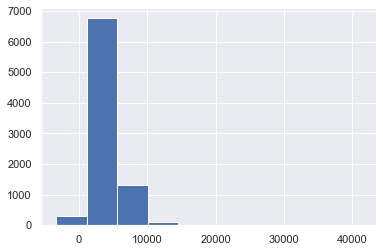

In [ ]:
plt.hist(company['active_days'], bins=10)
plt.show()

In [ ]:
print(company.columns)

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


In [ ]:
company.to_csv('final_company.csv', index=False)

**Exploratory Data Analysis**

In [ ]:
final_company = pd.read_csv(r'final_company.csv')

In [ ]:
final_company

category_code     status  founded_at  closed_at country_code  \
0              web  operating        2005     2021.0          USA   
1        cleantech  operating        2003     2021.0          USA   
2           mobile  operating        2003     2021.0          AUS   
3       enterprise  operating        2004     2021.0          USA   
4              web  operating        2006     2021.0          USA   
...            ...        ...         ...        ...          ...   
8553        mobile     closed        2008     2012.0          USA   
8554        social  operating        2011     2021.0          CAN   
8555   games_video     closed        2006     2012.0          USA   
8556         other  operating        2007     2021.0          USA   
8557     ecommerce  operating        2007     2021.0          USA   

      first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
0                 2005             2008             3.0         39750000.0   
1                 2011             2012             3.0         10125293.0   
2                 2003             2003             1.0           250000.0   
3                 2011             2011             1.0          1500000.0   
4                 2007             2007             1.0          2500000.0   
...                ...              ...             ...                ...   
8553              2008             2008             1.0           130000.0   
8554              2011             2011             1.0           500000.0   
8555              2008             2009             2.0          1100000.0   
8556              2008             2008             1.0           750000.0   
8557              2008             2008             1.0           475000.0   

      first_milestone_at  last_milestone_at  milestones  relationships  \
0                   2010               2013         5.0           17.0   
1                   2010               2010         1.0            6.0   
2                   2007               2007         1.0            2.0   
3                   2010               2010         1.0            8.0   
4                   2010               2012         2.0            7.0   
...                  ...                ...         ...            ...   
8553                2008               2009         2.0            3.0   
8554                2011               2011         1.0            2.0   
8555                2005               2008         2.0            4.0   
8556                2013               2013         1.0           14.0   
8557                2006               2008         2.0            1.0   

            lat         lng  isClosed  active_days  
0     47.606209 -122.332071         0       5840.0  
1     30.267153  -97.743061         0       6570.0  
2    -27.469771  153.025124         0       6570.0  
3     47.610150 -122.201516         0       6205.0  
4     37.774929 -122.419415         0       5475.0  
...         ...         ...       ...          ...  
8553  37.774929 -122.419415         1       1460.0  
8554  28.805267  -97.003598         0       3650.0  
8555  37.774929 -122.419415         1       2190.0  
8556  37.338208 -121.886329         0       5110.0  
8557  34.035633 -118.515590         0       5110.0  

[8558 rows x 17 columns]

**Univariate Analysis**

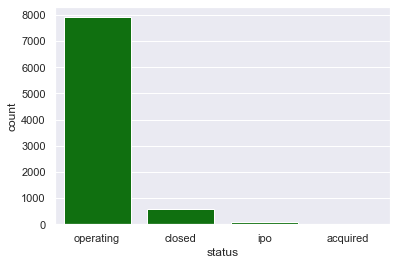

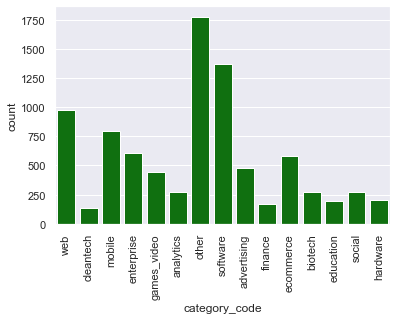

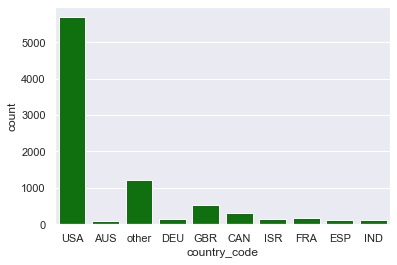

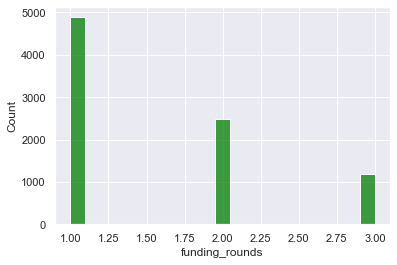

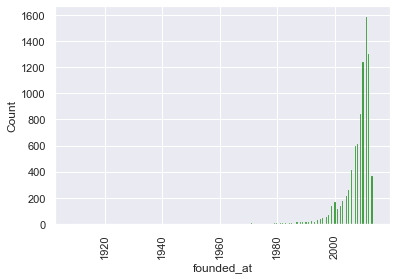

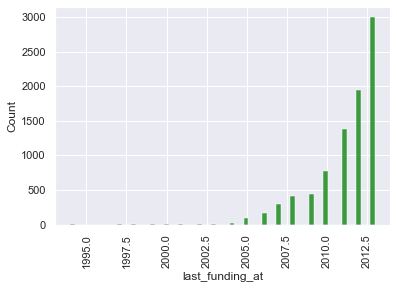

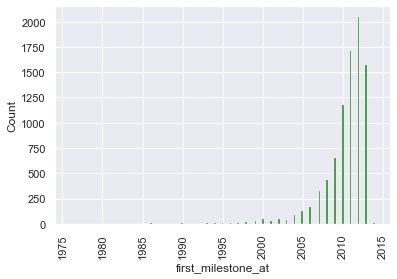

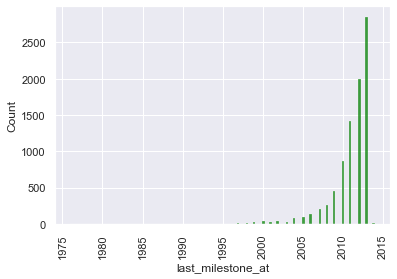

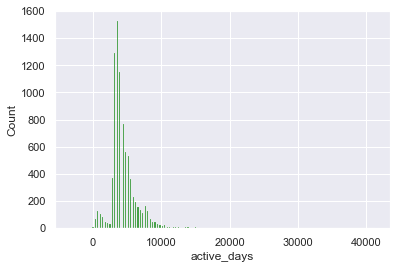

In [ ]:
# Univariate analysis of the 'status' column
sns.countplot(x='status', data=final_company, color = 'green')
plt.show()

# Univariate analysis of the 'category_code' column
sns.countplot(x='category_code', data=final_company, color = 'green')
plt.xticks(rotation = 90)
plt.show()

# Univariate analysis of the 'country_code' column
sns.countplot(x='country_code', data=final_company, color = 'green')
plt.show()

# Univariate analysis of the 'funding_rounds' column
sns.histplot(x='funding_rounds', data=final_company, color = 'green')
plt.show()

# Univariate analysis of the 'founded_at' column
sns.histplot(x='founded_at', data=final_company, color = 'green')
plt.xticks(rotation=90)
plt.show()

# Univariate analysis of the 'last_funding_at' column
sns.histplot(x='last_funding_at', data=final_company, color = 'green')
plt.xticks(rotation=90)
plt.show()

# Univariate analysis of the 'first_milestone_at' column
sns.histplot(x='first_milestone_at', data=final_company, color = 'green')
plt.xticks(rotation=90)
plt.show()

# Univariate analysis of the 'last_milestone_at' column
sns.histplot(x='last_milestone_at', data=final_company, color = 'green')
plt.xticks(rotation=90)
plt.show()

# Univariate analysis of the 'active_days' column
sns.histplot(x='active_days', data=final_company, color = 'green')
plt.show()

**Bivariate Analysis**

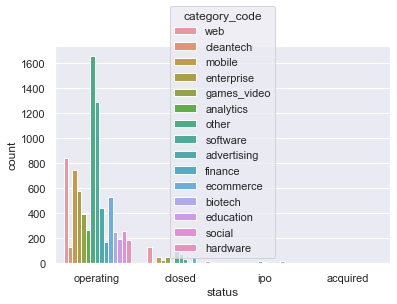

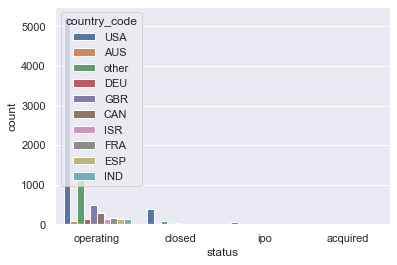

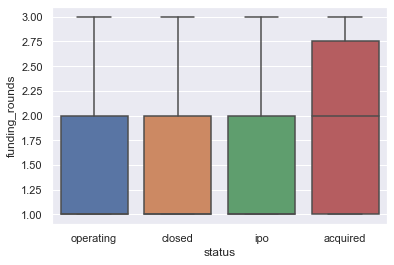

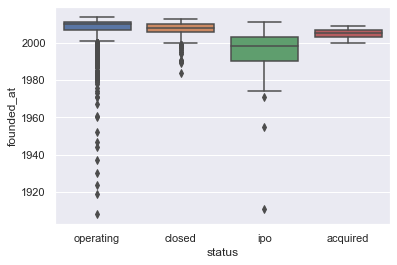

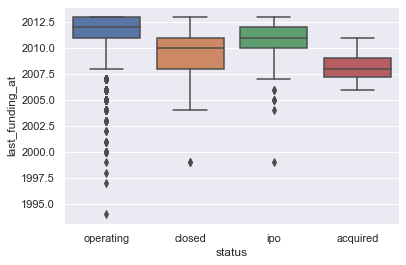

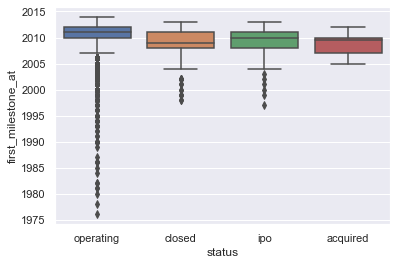

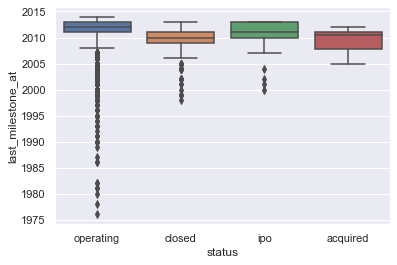

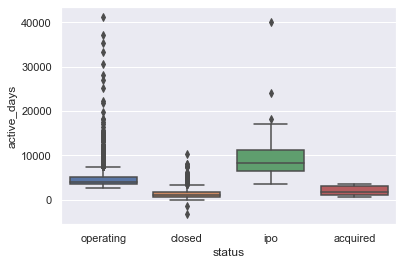

In [ ]:
# Bivariate analysis of the 'status' column and 'category_code' column
sns.countplot(x='status', hue='category_code', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'country_code' column
sns.countplot(x='status', hue='country_code', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'funding_rounds' column
sns.boxplot(x='status', y='funding_rounds', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'founded_at' column
sns.boxplot(x='status', y='founded_at', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'last_funding_at' column
sns.boxplot(x='status', y='last_funding_at', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'first_milestone_at' column
sns.boxplot(x='status', y='first_milestone_at', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'last_milestone_at' column
sns.boxplot(x='status', y='last_milestone_at', data=final_company)
plt.show()

# Bivariate analysis of the 'status' column and 'active_days' column
sns.boxplot(x='status', y='active_days', data=final_company)
plt.show()

**Multivariate Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
final_company['category_code'] = label_encoder.fit_transform(final_company['category_code'])
final_company['country_code'] = label_encoder.fit_transform(final_company['country_code'])
final_company

category_code     status  founded_at  closed_at  country_code  \
0                14  operating        2005     2021.0             8   
1                 3  operating        2003     2021.0             8   
2                10  operating        2003     2021.0             0   
3                 6  operating        2004     2021.0             8   
4                14  operating        2006     2021.0             8   
...             ...        ...         ...        ...           ...   
8553             10     closed        2008     2012.0             8   
8554             12  operating        2011     2021.0             1   
8555              8     closed        2006     2012.0             8   
8556             11  operating        2007     2021.0             8   
8557              4  operating        2007     2021.0             8   

      first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
0                 2005             2008             3.0         39750000.0   
1                 2011             2012             3.0         10125293.0   
2                 2003             2003             1.0           250000.0   
3                 2011             2011             1.0          1500000.0   
4                 2007             2007             1.0          2500000.0   
...                ...              ...             ...                ...   
8553              2008             2008             1.0           130000.0   
8554              2011             2011             1.0           500000.0   
8555              2008             2009             2.0          1100000.0   
8556              2008             2008             1.0           750000.0   
8557              2008             2008             1.0           475000.0   

      first_milestone_at  last_milestone_at  milestones  relationships  \
0                   2010               2013         5.0           17.0   
1                   2010               2010         1.0            6.0   
2                   2007               2007         1.0            2.0   
3                   2010               2010         1.0            8.0   
4                   2010               2012         2.0            7.0   
...                  ...                ...         ...            ...   
8553                2008               2009         2.0            3.0   
8554                2011               2011         1.0            2.0   
8555                2005               2008         2.0            4.0   
8556                2013               2013         1.0           14.0   
8557                2006               2008         2.0            1.0   

            lat         lng  isClosed  active_days  
0     47.606209 -122.332071         0       5840.0  
1     30.267153  -97.743061         0       6570.0  
2    -27.469771  153.025124         0       6570.0  
3     47.610150 -122.201516         0       6205.0  
4     37.774929 -122.419415         0       5475.0  
...         ...         ...       ...          ...  
8553  37.774929 -122.419415         1       1460.0  
8554  28.805267  -97.003598         0       3650.0  
8555  37.774929 -122.419415         1       2190.0  
8556  37.338208 -121.886329         0       5110.0  
8557  34.035633 -118.515590         0       5110.0  

[8558 rows x 17 columns]

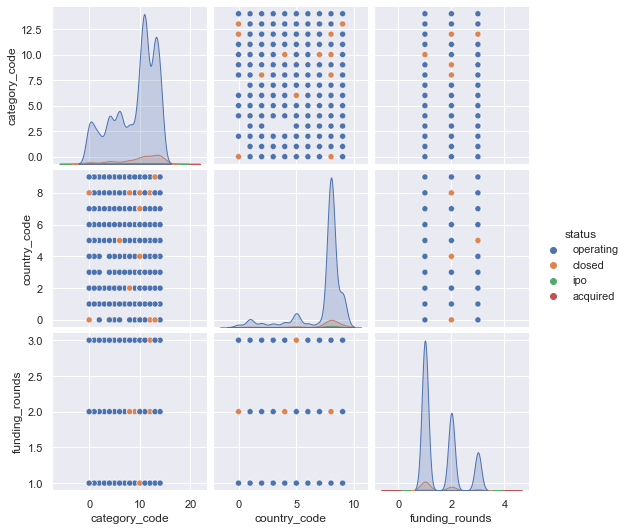

In [ ]:
# Multivariate analysis of the 'status' column, 'category_code', 'country_code', and 'funding_rounds' columns
sns.pairplot(data=final_company, hue='status', vars=['category_code', 'country_code', 'funding_rounds'])
plt.show()

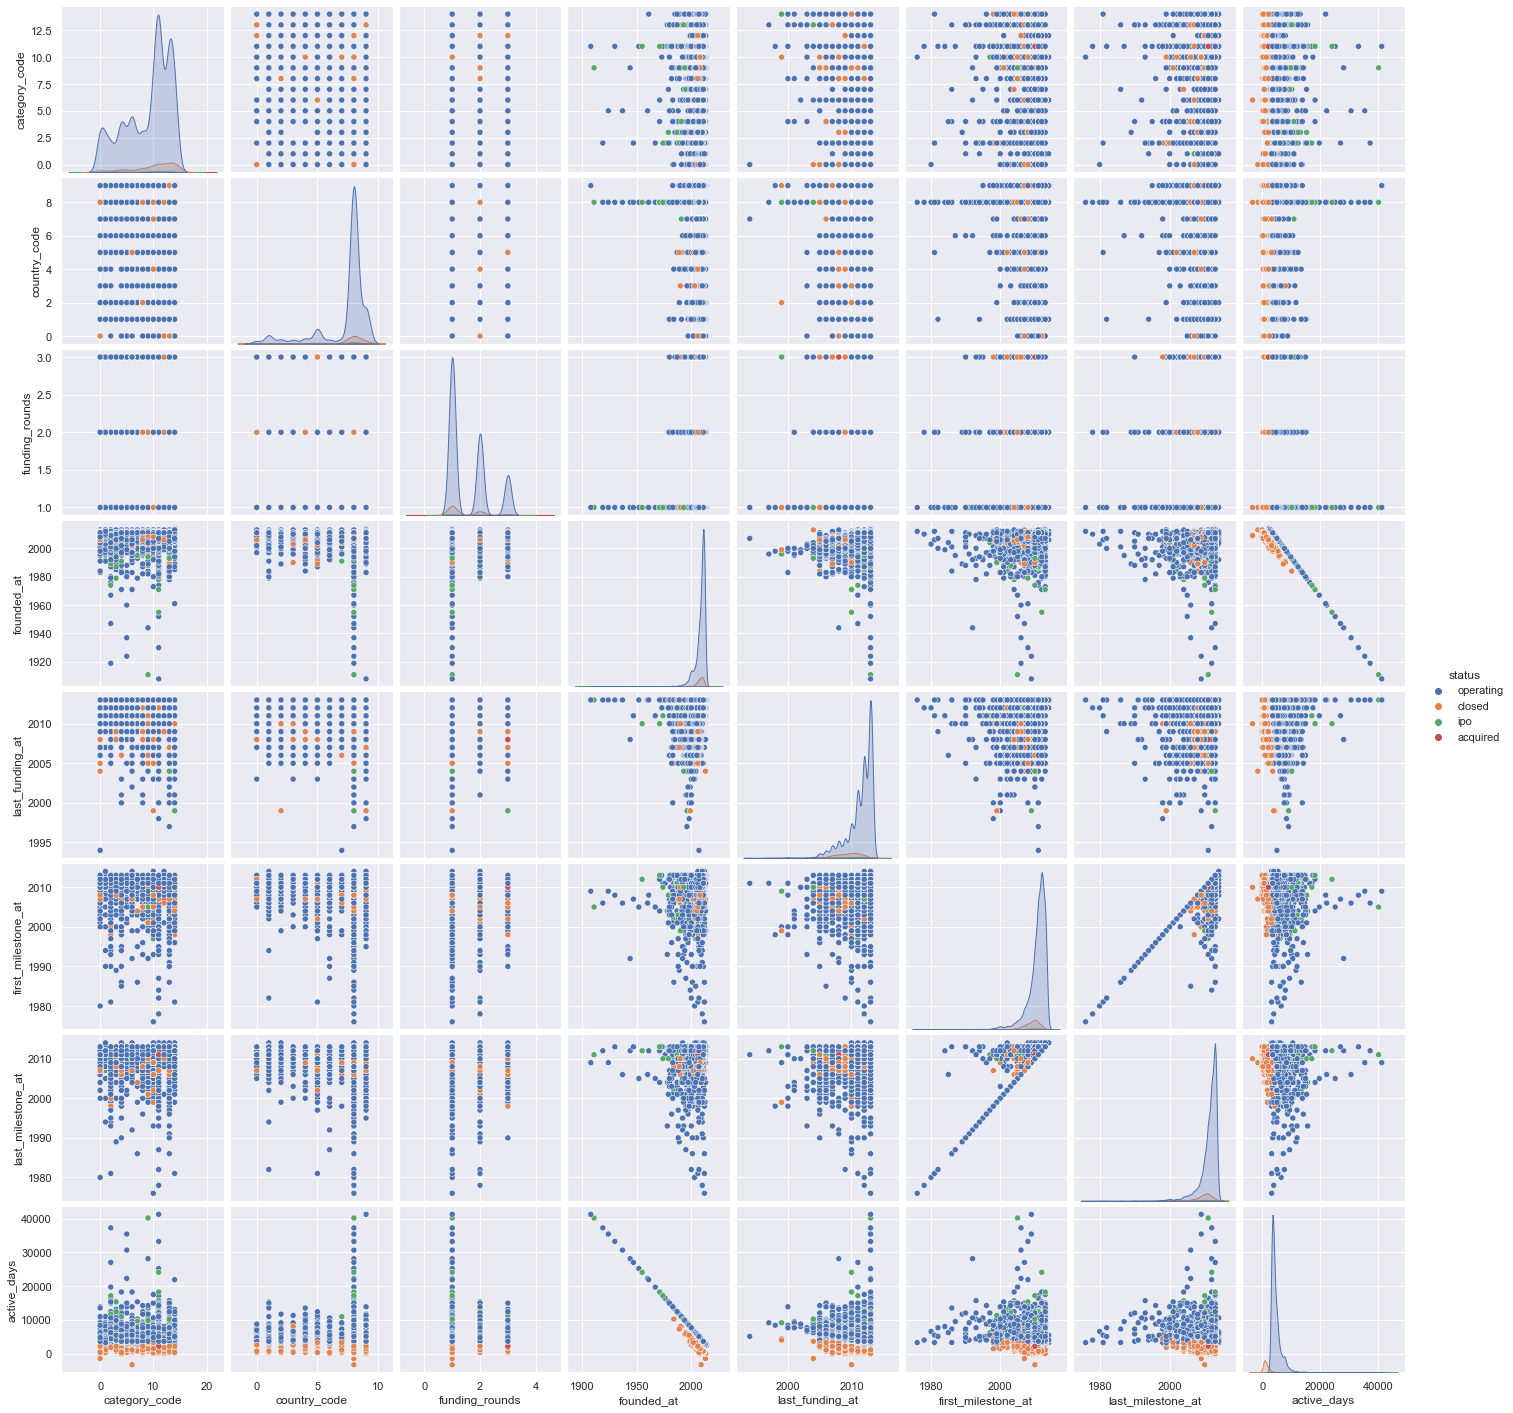

In [ ]:
# Multivariate analysis of the 'status' column, 'category_code', 'country_code', 'funding_rounds', 'founded_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', and 'active_days' columns
sns.pairplot(data=final_company, hue='status', vars=['category_code', 'country_code', 'funding_rounds', 'founded_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'active_days'])
plt.show()

In [ ]:
company = pd.read_csv('final_company.csv')

In [ ]:
company.drop(columns = ['closed_at'], inplace = True)

In [ ]:
company.sample(50)

category_code     status  founded_at country_code  first_funding_at  \
5897   games_video  operating        2009          USA              2011   
5239     analytics  operating        2009          USA              2009   
3417    enterprise  operating        2012          ISR              2012   
5732     analytics  operating        2010          USA              2010   
8262   advertising  operating        2011          USA              2012   
8400     education  operating        2011          USA              2011   
5938       biotech  operating        2004          USA              2010   
6246   games_video  operating        2008          GBR              2012   
7106           web     closed        2010          USA              2010   
1997    enterprise  operating        2010          USA              2013   
1297      software  operating        2010          USA              2006   
2833         other  operating        2012          CAN              2012   
6332       finance  operating        2010        other              2010   
5740      hardware  operating        2002          GBR              2009   
2066         other  operating        2012          USA              2012   
2411     analytics  operating        2011          GBR              2012   
5251      software   acquired        2004          USA              2006   
7292        mobile  operating        2007          USA              2008   
2369         other  operating        2012          USA              2012   
2354           web  operating        2010        other              2010   
1429         other  operating        2011          GBR              2012   
1576           web  operating        2007          DEU              2013   
3173         other  operating        2011        other              2011   
3584    enterprise  operating        2012          USA              2013   
679            web  operating        2012        other              2011   
228         mobile  operating        2009        other              2012   
3811        mobile  operating        2012          USA              2012   
5762     ecommerce  operating        2005          USA              2007   
3610       biotech  operating        2005          USA              2009   
4855         other  operating        2012          USA              2012   
957          other  operating        2012          USA              2012   
1951     analytics  operating        2011          USA              2012   
2416           web  operating        2012          USA              2012   
5297         other  operating        2008          USA              2011   
1286         other  operating        2010        other              2010   
6045      software  operating        2000          IND              2006   
515      education  operating        2009          USA              2010   
4537   advertising  operating        2012        other              2013   
214       software  operating        2000          USA              2003   
1451   advertising  operating        2011          GBR              2011   
4085      hardware  operating        2010        other              2012   
3580      software  operating        2011          USA              2013   
3593       biotech  operating        2007          USA              2013   
2371        mobile  operating        2010          FRA              2011   
6002         other  operating        2004          GBR              2010   
2856        mobile  operating        2011          USA              2011   
8024   games_video  operating        2010        other              2012   
2977   games_video  operating        2005        other              2007   
232            web     closed        2005          USA              2006   
7574        mobile     closed        2006          USA              2008   

      last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
5897             2011             1.0           

**Corelation and Multicolinarity**




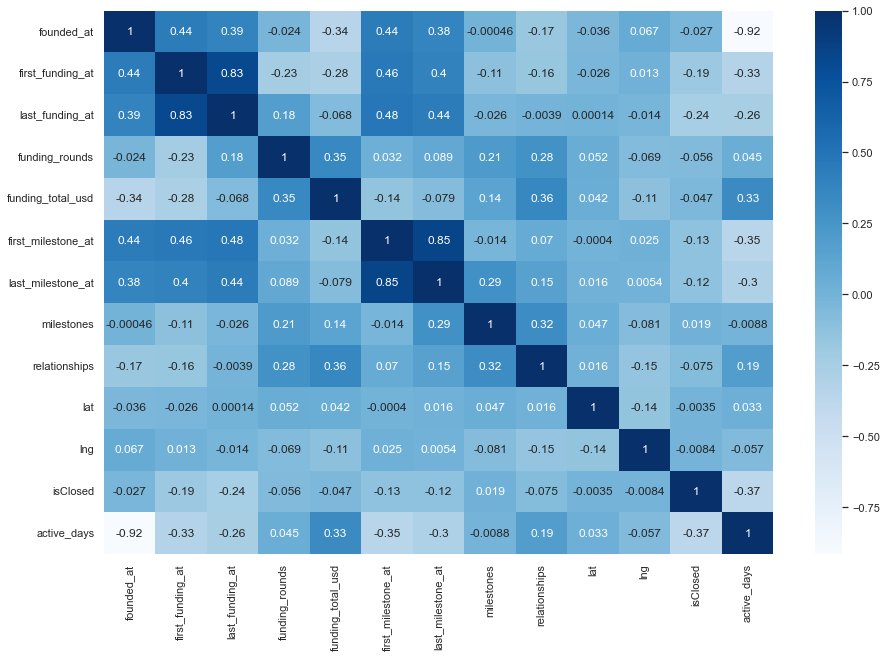

In [ ]:
#Using Pearson Correlation
numerical_columns = company.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
cor = numerical_columns.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [ ]:
cor["isClosed"].sort_values(ascending=False)

isClosed              1.000000
milestones            0.019429
lat                  -0.003461
lng                  -0.008377
founded_at           -0.027295
funding_total_usd    -0.047110
funding_rounds       -0.055991
relationships        -0.074904
last_milestone_at    -0.124594
first_milestone_at   -0.129901
first_funding_at     -0.187978
last_funding_at      -0.242213
active_days          -0.371845
Name: isClosed, dtype: float64

In [ ]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
vif_df = company.drop(["isClosed",'category_code','country_code'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calc_vif(df):
    # Exclude non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Check for missing values
    if numeric_df.isnull().values.any():
        raise ValueError("DataFrame contains missing values (NaNs)")

    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

# Call the calc_vif function with your DataFrame
vif_results = calc_vif(vif_df)
print(vif_results)

               feature           VIF
0           founded_at  8.487385e+05
1     first_funding_at  4.750111e+06
2      last_funding_at  5.345794e+06
3       funding_rounds  1.143019e+01
4    funding_total_usd  2.035900e+00
5   first_milestone_at  2.474305e+06
6    last_milestone_at  2.828570e+06
7           milestones  8.587856e+00
8        relationships  3.775143e+00
9                  lat  8.446831e+00
10                 lng  2.034544e+00
11         active_days  2.727478e+01


In [ ]:
X = company.drop(["isClosed",'category_code','country_code','last_milestone_at','first_funding_at','founded_at','last_funding_at','first_milestone_at'], axis=1)

In [ ]:
calc_vif(X)

feature       VIF
0     funding_rounds  5.782733
1  funding_total_usd  1.881440
2         milestones  5.202209
3      relationships  3.635861
4                lat  5.941173
5                lng  2.012193
6        active_days  4.736607

In [ ]:
# company = company.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

one hot encoding

In [ ]:
company

category_code     status  founded_at country_code  first_funding_at  \
0              web  operating        2005          USA              2005   
1        cleantech  operating        2003          USA              2011   
2           mobile  operating        2003          AUS              2003   
3       enterprise  operating        2004          USA              2011   
4              web  operating        2006          USA              2007   
...            ...        ...         ...          ...               ...   
8553        mobile     closed        2008          USA              2008   
8554        social  operating        2011          CAN              2011   
8555   games_video     closed        2006          USA              2008   
8556         other  operating        2007          USA              2008   
8557     ecommerce  operating        2007          USA              2008   

      last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0                2008             3.0         39750000.0                2010   
1                2012             3.0         10125293.0                2010   
2                2003             1.0           250000.0                2007   
3                2011             1.0          1500000.0                2010   
4                2007             1.0          2500000.0                2010   
...               ...             ...                ...                 ...   
8553             2008             1.0           130000.0                2008   
8554             2011             1.0           500000.0                2011   
8555             2009             2.0          1100000.0                2005   
8556             2008             1.0           750000.0                2013   
8557             2008             1.0           475000.0                2006   

      last_milestone_at  milestones  relationships        lat         lng  \
0                  2013         5.0           17.0  47.606209 -122.332071   
1                  2010         1.0            6.0  30.267153  -97.743061   
2                  2007         1.0            2.0 -27.469771  153.025124   
3                  2010         1.0            8.0  47.610150 -122.201516   
4                  2012         2.0            7.0  37.774929 -122.419415   
...                 ...         ...            ...        ...         ...   
8553               2009         2.0            3.0  37.774929 -122.419415   
8554               2011         1.0            2.0  28.805267  -97.003598   
8555               2008         2.0            4.0  37.774929 -122.419415   
8556               2013         1.0           14.0  37.338208 -121.886329   
8557               2008         2.0            1.0  34.035633 -118.515590   

      isClosed  active_days  
0            0       5840.0  
1            0       6570.0  
2            0       6570.0  
3            0       6205.0  
4            0       5475.0  
...        ...          ...  
8553         1       1460.0  
8554         0       3650.0  
8555         1       2190.0  
8556         0       5110.0  
8557         0       5110.0  

[8558 rows x 16 columns]

In [ ]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.category_code, prefix='category', drop_first=True)
dummies

category_analytics  category_biotech  category_cleantech  \
0                      0                 0                   0   
1                      0                 0                   1   
2                      0                 0                   0   
3                      0                 0                   0   
4                      0                 0                   0   
...                  ...               ...                 ...   
8553                   0                 0                   0   
8554                   0                 0                   0   
8555                   0                 0                   0   
8556                   0                 0                   0   
8557                   0                 0                   0   

      category_ecommerce  category_education  category_enterprise  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    1   
4                      0                   0                    0   
...                  ...                 ...                  ...   
8553                   0                   0                    0   
8554                   0                   0                    0   
8555                   0                   0                    0   
8556                   0                   0                    0   
8557                   1                   0                    0   

      category_finance  category_games_video  category_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   
...                ...                   ...                ...   
8553                 0                     0                  0   
8554                 0                     0                  0   
8555                 0                     1                  0   
8556                 0                     0                  0   
8557                 0                     0                  0   

      category_mobile  category_other  category_social  category_software  \
0                   0               0                0                  0   
1                   0               0                0                  0   
2                   1               0                0                  0   
3                   0               0                0                  0   
4                   0               0                0                  0   
...               ...             ...              ...                ...   
8553                1               0                0                  0   
8554                0               0                1                  0   
8555                0               0                0                  0   
8556                0               1                0                  0   
8557                0               0                0                  0   

      category_web  
0                1  
1                0  
2                0  
3                0  
4                1  
...            ...  
8553             0  
8554             0  
8555             0  
8556             0  
8557             0  

[8558 rows x 14 columns]

In [ ]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

category_code     status  founded_at country_code  first_funding_at  \
0              web  operating        2005          USA              2005   
1        cleantech  operating        2003          USA              2011   
2           mobile  operating        2003          AUS              2003   
3       enterprise  operating        2004          USA              2011   
4              web  operating        2006          USA              2007   
...            ...        ...         ...          ...               ...   
8553        mobile     closed        2008          USA              2008   
8554        social  operating        2011          CAN              2011   
8555   games_video     closed        2006          USA              2008   
8556         other  operating        2007          USA              2008   
8557     ecommerce  operating        2007          USA              2008   

      last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0                2008             3.0         39750000.0                2010   
1                2012             3.0         10125293.0                2010   
2                2003             1.0           250000.0                2007   
3                2011             1.0          1500000.0                2010   
4                2007             1.0          2500000.0                2010   
...               ...             ...                ...                 ...   
8553             2008             1.0           130000.0                2008   
8554             2011             1.0           500000.0                2011   
8555             2009             2.0          1100000.0                2005   
8556             2008             1.0           750000.0                2013   
8557             2008             1.0           475000.0                2006   

      last_milestone_at  milestones  relationships        lat         lng  \
0                  2013         5.0           17.0  47.606209 -122.332071   
1                  2010         1.0            6.0  30.267153  -97.743061   
2                  2007         1.0            2.0 -27.469771  153.025124   
3                  2010         1.0            8.0  47.610150 -122.201516   
4                  2012         2.0            7.0  37.774929 -122.419415   
...                 ...         ...            ...        ...         ...   
8553               2009         2.0            3.0  37.774929 -122.419415   
8554               2011         1.0            2.0  28.805267  -97.003598   
8555               2008         2.0            4.0  37.774929 -122.419415   
8556               2013         1.0           14.0  37.338208 -121.886329   
8557               2008         2.0            1.0  34.035633 -118.515590   

      isClosed  active_days  category_analytics  category_biotech  \
0            0       5840.0                   0                 0   
1            0       6570.0                   0                 0   
2            0       6570.0                   0                 0   
3            0       6205.0                   0                 0   
4            0       5475.0                   0                 0   
...        ...          ...                 ...               ...   
8553         1       1460.0                   0                 0   
8554         0       3650.0                   0                 0   
8555         1       2190.0                   0                 0   
8556         0       5110.0                   0                 0   
8557         0       5110.0                   0                 0   

      category_cleantech  category_ecommerce  category_education  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0             

In [ ]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [ ]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.country_code, prefix='country', drop_first=True)
dummies

country_CAN  country_DEU  country_ESP  country_FRA  country_GBR  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8553            0            0            0            0            0   
8554            1            0            0            0            0   
8555            0            0            0            0            0   
8556            0            0            0            0            0   
8557            0            0            0            0            0   

      country_IND  country_ISR  country_USA  country_other  
0               0            0            1              0  
1               0            0            1              0  
2               0            0            0              0  
3               0            0            1              0  
4               0            0            1              0  
...           ...          ...          ...            ...  
8553            0            0            1              0  
8554            0            0            0              0  
8555            0            0            1              0  
8556            0            0            1              0  
8557            0            0            1              0  

[8558 rows x 9 columns]

In [ ]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

status  founded_at country_code  first_funding_at  last_funding_at  \
0     operating        2005          USA              2005             2008   
1     operating        2003          USA              2011             2012   
2     operating        2003          AUS              2003             2003   
3     operating        2004          USA              2011             2011   
4     operating        2006          USA              2007             2007   
...         ...         ...          ...               ...              ...   
8553     closed        2008          USA              2008             2008   
8554  operating        2011          CAN              2011             2011   
8555     closed        2006          USA              2008             2009   
8556  operating        2007          USA              2008             2008   
8557  operating        2007          USA              2008             2008   

      funding_rounds  funding_total_usd  first_milestone_at  \
0                3.0         39750000.0                2010   
1                3.0         10125293.0                2010   
2                1.0           250000.0                2007   
3                1.0          1500000.0                2010   
4                1.0          2500000.0                2010   
...              ...                ...                 ...   
8553             1.0           130000.0                2008   
8554             1.0           500000.0                2011   
8555             2.0          1100000.0                2005   
8556             1.0           750000.0                2013   
8557             1.0           475000.0                2006   

      last_milestone_at  milestones  relationships        lat         lng  \
0                  2013         5.0           17.0  47.606209 -122.332071   
1                  2010         1.0            6.0  30.267153  -97.743061   
2                  2007         1.0            2.0 -27.469771  153.025124   
3                  2010         1.0            8.0  47.610150 -122.201516   
4                  2012         2.0            7.0  37.774929 -122.419415   
...                 ...         ...            ...        ...         ...   
8553               2009         2.0            3.0  37.774929 -122.419415   
8554               2011         1.0            2.0  28.805267  -97.003598   
8555               2008         2.0            4.0  37.774929 -122.419415   
8556               2013         1.0           14.0  37.338208 -121.886329   
8557               2008         2.0            1.0  34.035633 -118.515590   

      isClosed  active_days  category_analytics  category_biotech  \
0            0       5840.0                   0                 0   
1            0       6570.0                   0                 0   
2            0       6570.0                   0                 0   
3            0       6205.0                   0                 0   
4            0       5475.0                   0                 0   
...        ...          ...                 ...               ...   
8553         1       1460.0                   0                 0   
8554         0       3650.0                   0                 0   
8555         1       2190.0                   0                 0   
8556         0       5110.0                   0                 0   
8557         0       5110.0                   0                 0   

      category_cleantech  category_ecommerce  category_education  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
8553                   0                   0                   0   
8554 

In [ ]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [ ]:
company

status  founded_at  first_funding_at  last_funding_at  \
0     operating        2005              2005             2008   
1     operating        2003              2011             2012   
2     operating        2003              2003             2003   
3     operating        2004              2011             2011   
4     operating        2006              2007             2007   
...         ...         ...               ...              ...   
8553     closed        2008              2008             2008   
8554  operating        2011              2011             2011   
8555     closed        2006              2008             2009   
8556  operating        2007              2008             2008   
8557  operating        2007              2008             2008   

      funding_rounds  funding_total_usd  first_milestone_at  \
0                3.0         39750000.0                2010   
1                3.0         10125293.0                2010   
2                1.0           250000.0                2007   
3                1.0          1500000.0                2010   
4                1.0          2500000.0                2010   
...              ...                ...                 ...   
8553             1.0           130000.0                2008   
8554             1.0           500000.0                2011   
8555             2.0          1100000.0                2005   
8556             1.0           750000.0                2013   
8557             1.0           475000.0                2006   

      last_milestone_at  milestones  relationships        lat         lng  \
0                  2013         5.0           17.0  47.606209 -122.332071   
1                  2010         1.0            6.0  30.267153  -97.743061   
2                  2007         1.0            2.0 -27.469771  153.025124   
3                  2010         1.0            8.0  47.610150 -122.201516   
4                  2012         2.0            7.0  37.774929 -122.419415   
...                 ...         ...            ...        ...         ...   
8553               2009         2.0            3.0  37.774929 -122.419415   
8554               2011         1.0            2.0  28.805267  -97.003598   
8555               2008         2.0            4.0  37.774929 -122.419415   
8556               2013         1.0           14.0  37.338208 -121.886329   
8557               2008         2.0            1.0  34.035633 -118.515590   

      isClosed  active_days  category_analytics  category_biotech  \
0            0       5840.0                   0                 0   
1            0       6570.0                   0                 0   
2            0       6570.0                   0                 0   
3            0       6205.0                   0                 0   
4            0       5475.0                   0                 0   
...        ...          ...                 ...               ...   
8553         1       1460.0                   0                 0   
8554         0       3650.0                   0                 0   
8555         1       2190.0                   0                 0   
8556         0       5110.0                   0                 0   
8557         0       5110.0                   0                 0   

      category_cleantech  category_ecommerce  category_education  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
8553                   0                   0                   0   
8554                   0                   0                   0   
8555                   0                   0                   0   
8556                   0 

# Feature Engineering:


In [ ]:
company['milestone_period'] = company['last_milestone_at'] - company['first_milestone_at'] + 1
company['funding_period'] = company['last_funding_at'] - company['first_funding_at'] + 1
company

status  founded_at  first_funding_at  last_funding_at  \
0     operating        2005              2005             2008   
1     operating        2003              2011             2012   
2     operating        2003              2003             2003   
3     operating        2004              2011             2011   
4     operating        2006              2007             2007   
...         ...         ...               ...              ...   
8553     closed        2008              2008             2008   
8554  operating        2011              2011             2011   
8555     closed        2006              2008             2009   
8556  operating        2007              2008             2008   
8557  operating        2007              2008             2008   

      funding_rounds  funding_total_usd  first_milestone_at  \
0                3.0         39750000.0                2010   
1                3.0         10125293.0                2010   
2                1.0           250000.0                2007   
3                1.0          1500000.0                2010   
4                1.0          2500000.0                2010   
...              ...                ...                 ...   
8553             1.0           130000.0                2008   
8554             1.0           500000.0                2011   
8555             2.0          1100000.0                2005   
8556             1.0           750000.0                2013   
8557             1.0           475000.0                2006   

      last_milestone_at  milestones  relationships        lat         lng  \
0                  2013         5.0           17.0  47.606209 -122.332071   
1                  2010         1.0            6.0  30.267153  -97.743061   
2                  2007         1.0            2.0 -27.469771  153.025124   
3                  2010         1.0            8.0  47.610150 -122.201516   
4                  2012         2.0            7.0  37.774929 -122.419415   
...                 ...         ...            ...        ...         ...   
8553               2009         2.0            3.0  37.774929 -122.419415   
8554               2011         1.0            2.0  28.805267  -97.003598   
8555               2008         2.0            4.0  37.774929 -122.419415   
8556               2013         1.0           14.0  37.338208 -121.886329   
8557               2008         2.0            1.0  34.035633 -118.515590   

      isClosed  active_days  category_analytics  category_biotech  \
0            0       5840.0                   0                 0   
1            0       6570.0                   0                 0   
2            0       6570.0                   0                 0   
3            0       6205.0                   0                 0   
4            0       5475.0                   0                 0   
...        ...          ...                 ...               ...   
8553         1       1460.0                   0                 0   
8554         0       3650.0                   0                 0   
8555         1       2190.0                   0                 0   
8556         0       5110.0                   0                 0   
8557         0       5110.0                   0                 0   

      category_cleantech  category_ecommerce  category_education  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
8553                   0                   0                   0   
8554                   0                   0                   0   
8555                   0                   0                   0   
8556                   0 

In [ ]:
company.drop(columns = ['last_milestone_at', 'first_milestone_at', 'first_funding_at', 'last_funding_at'], inplace = True)
company

status  founded_at  funding_rounds  funding_total_usd  milestones  \
0     operating        2005             3.0         39750000.0         5.0   
1     operating        2003             3.0         10125293.0         1.0   
2     operating        2003             1.0           250000.0         1.0   
3     operating        2004             1.0          1500000.0         1.0   
4     operating        2006             1.0          2500000.0         2.0   
...         ...         ...             ...                ...         ...   
8553     closed        2008             1.0           130000.0         2.0   
8554  operating        2011             1.0           500000.0         1.0   
8555     closed        2006             2.0          1100000.0         2.0   
8556  operating        2007             1.0           750000.0         1.0   
8557  operating        2007             1.0           475000.0         2.0   

      relationships        lat         lng  isClosed  active_days  \
0              17.0  47.606209 -122.332071         0       5840.0   
1               6.0  30.267153  -97.743061         0       6570.0   
2               2.0 -27.469771  153.025124         0       6570.0   
3               8.0  47.610150 -122.201516         0       6205.0   
4               7.0  37.774929 -122.419415         0       5475.0   
...             ...        ...         ...       ...          ...   
8553            3.0  37.774929 -122.419415         1       1460.0   
8554            2.0  28.805267  -97.003598         0       3650.0   
8555            4.0  37.774929 -122.419415         1       2190.0   
8556           14.0  37.338208 -121.886329         0       5110.0   
8557            1.0  34.035633 -118.515590         0       5110.0   

      category_analytics  category_biotech  category_cleantech  \
0                      0                 0                   0   
1                      0                 0                   1   
2                      0                 0                   0   
3                      0                 0                   0   
4                      0                 0                   0   
...                  ...               ...                 ...   
8553                   0                 0                   0   
8554                   0                 0                   0   
8555                   0                 0                   0   
8556                   0                 0                   0   
8557                   0                 0                   0   

      category_ecommerce  category_education  category_enterprise  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    1   
4                      0                   0                    0   
...                  ...                 ...                  ...   
8553                   0                   0                    0   
8554                   0                   0                    0   
8555                   0                   0                    0   
8556                   0                   0                    0   
8557                   1                   0                    0   

      category_finance  category_games_video  category_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   
...                ...                   ...                ...   
8553                 0                     0                  0   
8554                 0                     0                  0   
8555              

In [ ]:
company.describe()

founded_at  funding_rounds  funding_total_usd   milestones  \
count  8558.000000     8558.000000       8.558000e+03  8558.000000   
mean   2008.056672        1.567305       5.274194e+06     1.532601   
std       5.485855        0.722817       7.937641e+06     0.752263   
min    1908.000000        1.000000       2.910000e+02     1.000000   
25%    2007.000000        1.000000       3.500000e+05     1.000000   
50%    2010.000000        1.000000       1.600000e+06     1.000000   
75%    2011.000000        2.000000       6.534682e+06     2.000000   
max    2014.000000        3.000000       4.019970e+07     7.000000   

       relationships          lat          lng     isClosed  active_days  \
count    8558.000000  8558.000000  8558.000000  8558.000000   8558.00000   
mean        4.736504    38.347090   -62.604799     0.067072   4495.07011   
std         3.547122    14.251702    64.917423     0.250161   2152.43067   
min         1.000000   -42.883611  -158.056896     0.000000  -3285.00000   
25%         2.000000    36.169941  -119.417932     0.000000   3285.00000   
50%         4.000000    39.368231   -79.383184     0.000000   4015.00000   
75%         6.000000    44.058173    -0.127758     0.000000   5110.00000   
max        17.000000    70.919200   174.776236     1.000000  41245.00000   

       category_analytics  category_biotech  category_cleantech  \
count         8558.000000       8558.000000         8558.000000   
mean             0.031900          0.032134            0.016242   
std              0.175744          0.176365            0.126413   
min              0.000000          0.000000            0.000000   
25%              0.000000          0.000000            0.000000   
50%              0.000000          0.000000            0.000000   
75%              0.000000          0.000000            0.000000   
max              1.000000          1.000000            1.000000   

       category_ecommerce  category_education  category_enterprise  \
count         8558.000000         8558.000000          8558.000000   
mean             0.067539            0.022669             0.071045   
std              0.250968            0.148854             0.256914   
min              0.000000            0.000000             0.000000   
25%              0.000000            0.000000             0.000000   
50%              0.000000            0.000000             0.000000   
75%              0.000000            0.000000             0.000000   
max              1.000000            1.000000             1.000000   

       category_finance  category_games_video  category_hardware  \
count       8558.000000           8558.000000        8558.000000   
mean           0.020215              0.051998           0.023487   
std            0.140743              0.222036           0.151452   
min            0.000000              0.000000           0.000000   
25%            0.000000              0.000000           0.000000   
50%            0.000000              0.000000           0.000000   
75%            0.000000              0.000000           0.000000   
max            1.000000              1.000000           1.000000   

       category_mobile  category_other  category_social  category_software  \
count      8558.000000     8558.000000      8558.000000        8558.000000   
mean          0.093246        0.207642         0.032251           0.160318   
std           0.290794        0.405643         0.176675           0.366922   
min           0.000000        0.000000         0.000000           0.000000   
25%           0.000000        0.000000         0.000000           0.000000   
50%           0.000000        0.000000         0.000000           0.000000   
75%           0.000000        0.000000         0.000000           0.000000   
max           1.000000        1.000000         1.000000           1.000000   

       category_web  country_CAN  country_DEU  country_ESP  country_FRA  \
count   8558.000000  8558.000000  8558.000000  8558.000000  8558.0

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   status                8558 non-null   object 
 1   founded_at            8558 non-null   int64  
 2   funding_rounds        8558 non-null   float64
 3   funding_total_usd     8558 non-null   float64
 4   milestones            8558 non-null   float64
 5   relationships         8558 non-null   float64
 6   lat                   8558 non-null   float64
 7   lng                   8558 non-null   float64
 8   isClosed              8558 non-null   int64  
 9   active_days           8558 non-null   float64
 10  category_analytics    8558 non-null   uint8  
 11  category_biotech      8558 non-null   uint8  
 12  category_cleantech    8558 non-null   uint8  
 13  category_ecommerce    8558 non-null   uint8  
 14  category_education    8558 non-null   uint8  
 15  category_enterprise  

In [ ]:
company.milestone_period = company.milestone_period.fillna(0)
company.funding_period = company.funding_period.fillna(0)
company

status  founded_at  funding_rounds  funding_total_usd  milestones  \
0     operating        2005             3.0         39750000.0         5.0   
1     operating        2003             3.0         10125293.0         1.0   
2     operating        2003             1.0           250000.0         1.0   
3     operating        2004             1.0          1500000.0         1.0   
4     operating        2006             1.0          2500000.0         2.0   
...         ...         ...             ...                ...         ...   
8553     closed        2008             1.0           130000.0         2.0   
8554  operating        2011             1.0           500000.0         1.0   
8555     closed        2006             2.0          1100000.0         2.0   
8556  operating        2007             1.0           750000.0         1.0   
8557  operating        2007             1.0           475000.0         2.0   

      relationships        lat         lng  isClosed  active_days  \
0              17.0  47.606209 -122.332071         0       5840.0   
1               6.0  30.267153  -97.743061         0       6570.0   
2               2.0 -27.469771  153.025124         0       6570.0   
3               8.0  47.610150 -122.201516         0       6205.0   
4               7.0  37.774929 -122.419415         0       5475.0   
...             ...        ...         ...       ...          ...   
8553            3.0  37.774929 -122.419415         1       1460.0   
8554            2.0  28.805267  -97.003598         0       3650.0   
8555            4.0  37.774929 -122.419415         1       2190.0   
8556           14.0  37.338208 -121.886329         0       5110.0   
8557            1.0  34.035633 -118.515590         0       5110.0   

      category_analytics  category_biotech  category_cleantech  \
0                      0                 0                   0   
1                      0                 0                   1   
2                      0                 0                   0   
3                      0                 0                   0   
4                      0                 0                   0   
...                  ...               ...                 ...   
8553                   0                 0                   0   
8554                   0                 0                   0   
8555                   0                 0                   0   
8556                   0                 0                   0   
8557                   0                 0                   0   

      category_ecommerce  category_education  category_enterprise  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    1   
4                      0                   0                    0   
...                  ...                 ...                  ...   
8553                   0                   0                    0   
8554                   0                   0                    0   
8555                   0                   0                    0   
8556                   0                   0                    0   
8557                   1                   0                    0   

      category_finance  category_games_video  category_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   
...                ...                   ...                ...   
8553                 0                     0                  0   
8554                 0                     0                  0   
8555              

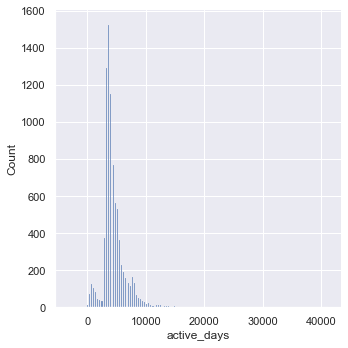

In [ ]:
sns.displot(company['active_days'])
plt.show()

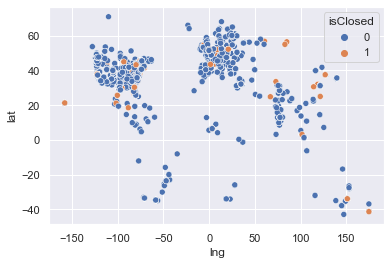

In [ ]:
sns.scatterplot(x='lng', y='lat', hue='isClosed', data=company)
plt.show()

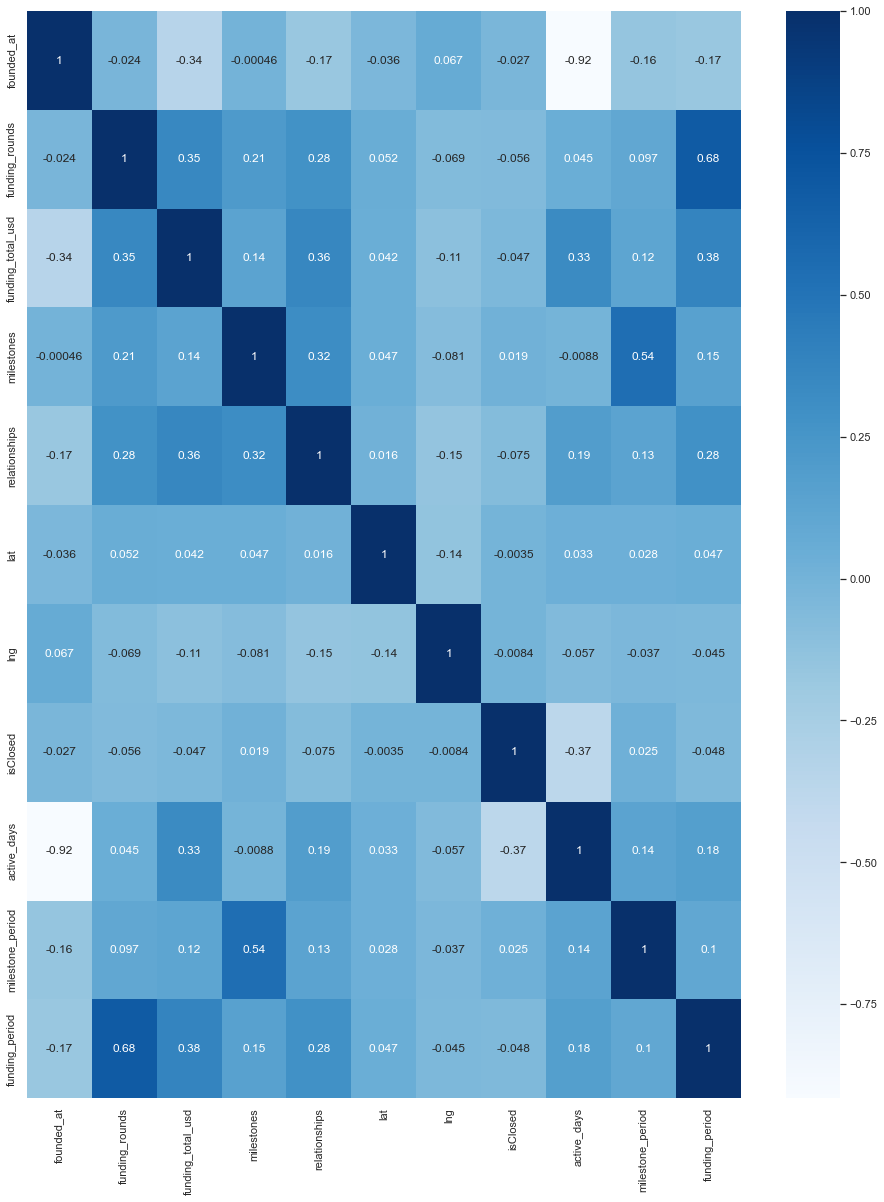

In [ ]:
cols = ['founded_at',	'funding_rounds',	'funding_total_usd',	'milestones',	'relationships',	'lat',	'lng',	'isClosed',	'active_days',	'milestone_period',	'funding_period']
corr = company[cols].corr()
plt.figure(figsize=(16,20))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

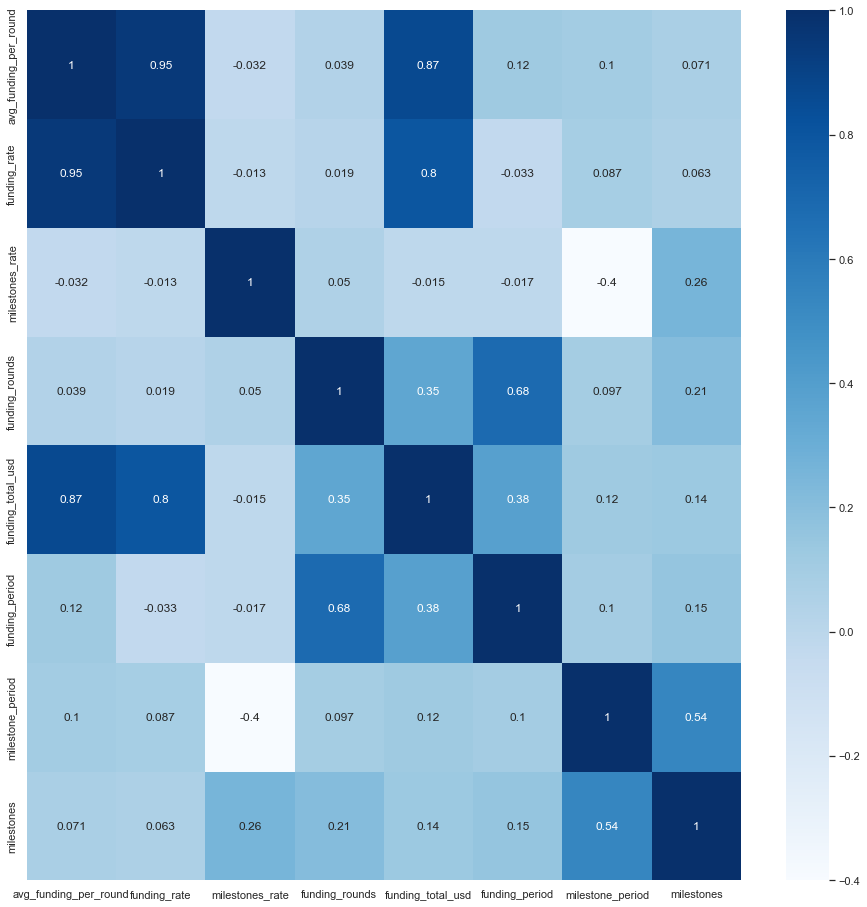

In [ ]:
company['avg_funding_per_round'] = company['funding_total_usd'] / company['funding_rounds']

company['funding_rate'] = company['funding_total_usd'] / company['funding_period']

company['milestones_rate'] = company['milestones'] / company['milestone_period']

corr_new_old_features = company[['avg_funding_per_round', 'funding_rate', 'milestones_rate', 'funding_rounds', 'funding_total_usd', 'funding_period', 'milestone_period', 'milestones']].corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr_new_old_features, annot=True, cmap='Blues')
plt.show()

In [ ]:
company.drop(columns = ['funding_rounds', 'funding_total_usd', 'funding_period', 'milestone_period', 'milestones', 'funding_rate'], inplace=True)
company

status  founded_at  relationships        lat         lng  isClosed  \
0     operating        2005           17.0  47.606209 -122.332071         0   
1     operating        2003            6.0  30.267153  -97.743061         0   
2     operating        2003            2.0 -27.469771  153.025124         0   
3     operating        2004            8.0  47.610150 -122.201516         0   
4     operating        2006            7.0  37.774929 -122.419415         0   
...         ...         ...            ...        ...         ...       ...   
8553     closed        2008            3.0  37.774929 -122.419415         1   
8554  operating        2011            2.0  28.805267  -97.003598         0   
8555     closed        2006            4.0  37.774929 -122.419415         1   
8556  operating        2007           14.0  37.338208 -121.886329         0   
8557  operating        2007            1.0  34.035633 -118.515590         0   

      active_days  category_analytics  category_biotech  category_cleantech  \
0          5840.0                   0                 0                   0   
1          6570.0                   0                 0                   1   
2          6570.0                   0                 0                   0   
3          6205.0                   0                 0                   0   
4          5475.0                   0                 0                   0   
...           ...                 ...               ...                 ...   
8553       1460.0                   0                 0                   0   
8554       3650.0                   0                 0                   0   
8555       2190.0                   0                 0                   0   
8556       5110.0                   0                 0                   0   
8557       5110.0                   0                 0                   0   

      category_ecommerce  category_education  category_enterprise  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    1   
4                      0                   0                    0   
...                  ...                 ...                  ...   
8553                   0                   0                    0   
8554                   0                   0                    0   
8555                   0                   0                    0   
8556                   0                   0                    0   
8557                   1                   0                    0   

      category_finance  category_games_video  category_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   
...                ...                   ...                ...   
8553                 0                     0                  0   
8554                 0                     0                  0   
8555                 0                     1                  0   
8556                 0                     0                  0   
8557                 0                     0                  0   

      category_mobile  category_other  category_social  category_software  \
0                   0               0                0                  0   
1                   0               0                0                  0   
2                   1               0                0                  0   
3                   0               0                0                  0   
4                   0               0                0                  0   
...            

In [ ]:
company['milestones_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
company['milestones_rate'] = company['milestones_rate'].fillna(0)
company

status  founded_at  relationships        lat         lng  isClosed  \
0     operating        2005           17.0  47.606209 -122.332071         0   
1     operating        2003            6.0  30.267153  -97.743061         0   
2     operating        2003            2.0 -27.469771  153.025124         0   
3     operating        2004            8.0  47.610150 -122.201516         0   
4     operating        2006            7.0  37.774929 -122.419415         0   
...         ...         ...            ...        ...         ...       ...   
8553     closed        2008            3.0  37.774929 -122.419415         1   
8554  operating        2011            2.0  28.805267  -97.003598         0   
8555     closed        2006            4.0  37.774929 -122.419415         1   
8556  operating        2007           14.0  37.338208 -121.886329         0   
8557  operating        2007            1.0  34.035633 -118.515590         0   

      active_days  category_analytics  category_biotech  category_cleantech  \
0          5840.0                   0                 0                   0   
1          6570.0                   0                 0                   1   
2          6570.0                   0                 0                   0   
3          6205.0                   0                 0                   0   
4          5475.0                   0                 0                   0   
...           ...                 ...               ...                 ...   
8553       1460.0                   0                 0                   0   
8554       3650.0                   0                 0                   0   
8555       2190.0                   0                 0                   0   
8556       5110.0                   0                 0                   0   
8557       5110.0                   0                 0                   0   

      category_ecommerce  category_education  category_enterprise  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    0   
3                      0                   0                    1   
4                      0                   0                    0   
...                  ...                 ...                  ...   
8553                   0                   0                    0   
8554                   0                   0                    0   
8555                   0                   0                    0   
8556                   0                   0                    0   
8557                   1                   0                    0   

      category_finance  category_games_video  category_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   
...                ...                   ...                ...   
8553                 0                     0                  0   
8554                 0                     0                  0   
8555                 0                     1                  0   
8556                 0                     0                  0   
8557                 0                     0                  0   

      category_mobile  category_other  category_social  category_software  \
0                   0               0                0                  0   
1                   0               0                0                  0   
2                   1               0                0                  0   
3                   0               0                0                  0   
4                   0               0                0                  0   
...            

In [ ]:
company2 = company.copy(deep = True)

In [ ]:
company.columns

Index(['status', 'founded_at', 'relationships', 'lat', 'lng', 'isClosed',
       'active_days', 'category_analytics', 'category_biotech',
       'category_cleantech', 'category_ecommerce', 'category_education',
       'category_enterprise', 'category_finance', 'category_games_video',
       'category_hardware', 'category_mobile', 'category_other',
       'category_social', 'category_software', 'category_web', 'country_CAN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IND', 'country_ISR', 'country_USA', 'country_other',
       'avg_funding_per_round', 'milestones_rate'],
      dtype='object')

In [ ]:
company['status'] = company['status'].apply(lambda x: 0 if (x == 'operating' or x == 'ipo') else 1 )

In [ ]:
company['status'].unique()

array([0, 1], dtype=int64)

Text(0.5, 0, 'Feature Importance')

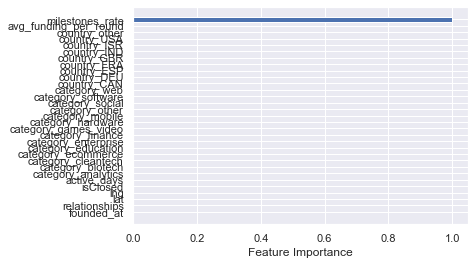

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
cols = ['founded_at', 'relationships', 'lat', 'lng', 'isClosed',
       'active_days', 'category_analytics', 'category_biotech',
       'category_cleantech', 'category_ecommerce', 'category_education',
       'category_enterprise', 'category_finance', 'category_games_video',
       'category_hardware', 'category_mobile', 'category_other',
       'category_social', 'category_software', 'category_web', 'country_CAN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IND', 'country_ISR', 'country_USA', 'country_other',
       'avg_funding_per_round', 'milestones_rate']

X_import = company[cols]
y_import = company['status']

X_train, X_test, y_train, y_test = train_test_split(X_import, y_import, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(cols, rf.feature_importances_[sort])
plt.xlabel('Feature Importance')


In [ ]:
# scaling the selected features:

from sklearn import preprocessing

scalar = preprocessing.StandardScaler()
company['active_days'] = scalar.fit_transform(company[['active_days']])
company['milestones_rate'] = scalar.fit_transform(company[['milestones_rate']])

company.describe()

status   founded_at  relationships          lat          lng  \
count  8558.000000  8558.000000    8558.000000  8558.000000  8558.000000   
mean      0.067072  2008.056672       4.736504    38.347090   -62.604799   
std       0.250161     5.485855       3.547122    14.251702    64.917423   
min       0.000000  1908.000000       1.000000   -42.883611  -158.056896   
25%       0.000000  2007.000000       2.000000    36.169941  -119.417932   
50%       0.000000  2010.000000       4.000000    39.368231   -79.383184   
75%       0.000000  2011.000000       6.000000    44.058173    -0.127758   
max       1.000000  2014.000000      17.000000    70.919200   174.776236   

          isClosed   active_days  category_analytics  category_biotech  \
count  8558.000000  8.558000e+03         8558.000000       8558.000000   
mean      0.067072 -2.809547e-16            0.031900          0.032134   
std       0.250161  1.000058e+00            0.175744          0.176365   
min       0.000000 -3.614762e+00            0.000000          0.000000   
25%       0.000000 -5.622206e-01            0.000000          0.000000   
50%       0.000000 -2.230493e-01            0.000000          0.000000   
75%       0.000000  2.857076e-01            0.000000          0.000000   
max       1.000000  1.707469e+01            1.000000          1.000000   

       category_cleantech  category_ecommerce  category_education  \
count         8558.000000         8558.000000         8558.000000   
mean             0.016242            0.067539            0.022669   
std              0.126413            0.250968            0.148854   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       category_enterprise  category_finance  category_games_video  \
count          8558.000000       8558.000000           8558.000000   
mean              0.071045          0.020215              0.051998   
std               0.256914          0.140743              0.222036   
min               0.000000          0.000000              0.000000   
25%               0.000000          0.000000              0.000000   
50%               0.000000          0.000000              0.000000   
75%               0.000000          0.000000              0.000000   
max               1.000000          1.000000              1.000000   

       category_hardware  category_mobile  category_other  category_social  \
count        8558.000000      8558.000000     8558.000000      8558.000000   
mean            0.023487         0.093246        0.207642         0.032251   
std             0.151452         0.290794        0.405643         0.176675   
min             0.000000         0.000000        0.000000         0.000000   
25%             0.000000         0.000000        0.000000         0.000000   
50%             0.000000         0.000000        0.000000         0.000000   
75%             0.000000         0.000000        0.000000         0.000000   
max             1.000000         1.000000        1.000000         1.000000   

       category_software  category_web  country_CAN  country_DEU  country_ESP  \
count        8558.000000   8558.000000  8558.000000  8558.000000  8558.000000   
mean            0.160318      0.113812     0.034821     0.017060     0.014840   
std             0.366922      0.317601     0.183337     0.129503     0.120919   
min             0.000000      0.000000     0.000000     0.000000     0.000000   
25%             0.000000      0.000000     0.000000     0.000000     0.000000   
50%             0.000000      0.000000     0.000000     0.000000     0.000000   
75%             0.000000      0.000000     0.000000     0.000000     0.000000   
max             1.000000      1.000000     1.000000     

In [ ]:
company.status.unique()

array([0, 1], dtype=int64)

In [ ]:
company.to_csv('data_company.csv', index=False)

In [ ]:
company = pd.read_csv('data_company.csv')

In [ ]:
X  = company.drop(columns=['status'])
y = company['status']

In [ ]:
# Applying PCA:

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)


In [ ]:
df = pd.DataFrame(data = principal_components, columns = ['component 1', 'component 2'])
finalDf = pd.concat([df, y], axis = 1)
finalDf

component 1  component 2  status
0     9.978473e+06   -48.367440       0
1     1.035707e+05   -34.767529       0
2    -3.021527e+06   214.050535       0
3    -1.771527e+06   -61.973365       0
4    -7.715270e+05   -60.693200       0
...            ...          ...     ...
8553 -3.141527e+06   -63.442208       1
8554 -2.771527e+06   -37.302427       0
8555 -2.721527e+06   -62.960965       1
8556 -2.521527e+06   -62.248443       0
8557 -2.796527e+06   -59.005941       0

[8558 rows x 3 columns]

In [ ]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.57128473e-10])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
#RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#RandomForestClassifier with regularization
rf_classifier_reg = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_classifier_reg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model to the training data
rf_classifier_reg.fit(X_train, y_train)

#model's performance on the testing set
accuracy_reg = rf_classifier_reg.score(X_test, y_test)
print("Accuracy on Testing Set (with Regularization):", accuracy_reg)

Cross-Validation Scores: [0.93576642 0.93498904 0.93498904 0.9357195  0.93498904]
Mean CV Accuracy: 0.9352906111872377
Accuracy on Testing Set (with Regularization): 0.9217289719626168


In [ ]:
y_pred = rf_classifier_reg.predict(X_test)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1578    0]
 [ 134    0]]


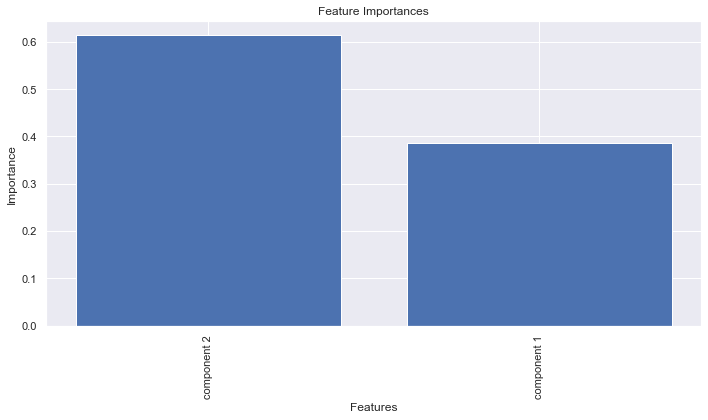

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**k-Nearest Neighbors(k-NN) Model**

1. Data Preparation

In [ ]:
X = company.drop('status', axis=1)
y = company['status']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded Label Mapping:", label_mapping)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Encoded Label Mapping: {0: 0, 1: 1}
Shape of X: (8558, 31)
Shape of y: (8558,)


2. Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print("Training set - Features:", X_train.shape)
print("Training set - Target:", y_train.shape)
print("Testing set - Features:", X_test.shape)
print("Testing set - Target:", y_test.shape)

Training set - Features: (6846, 31)
Training set - Target: (6846,)
Testing set - Features: (1712, 31)
Testing set - Target: (1712,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform cross-validation for each value of n_neighbors
cv_scores = {}
for n_neighbors in param_grid['n_neighbors']:
    knn_classifier.set_params(n_neighbors=n_neighbors)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    cv_scores[n_neighbors] = scores

# Calculate mean accuracy for each value of n_neighbors
mean_cv_scores = {k: np.mean(v) for k, v in cv_scores.items()}

# Find the best value of n_neighbors based on cross-validation scores
best_n_neighbors = max(mean_cv_scores, key=mean_cv_scores.get)

# Print mean cross-validation scores for each value of n_neighbors
print("Mean cross-validation scores:")
for n_neighbors, mean_score in mean_cv_scores.items():
    print(f"n_neighbors={n_neighbors}: {mean_score:.4f}")

# Print the best value of n_neighbors
print("\nBest value of n_neighbors based on cross-validation:", best_n_neighbors)

Mean cross-validation scores:
n_neighbors=3: 0.9230
n_neighbors=5: 0.9316
n_neighbors=7: 0.9330
n_neighbors=9: 0.9330
n_neighbors=11: 0.9330

Best value of n_neighbors based on cross-validation: 7


3. Training the k-NN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=10, metric='hamming')

knn_classifier.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


4. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9772196261682243

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1597
           1       1.00      0.66      0.80       115

    accuracy                           0.98      1712
   macro avg       0.99      0.83      0.89      1712
weighted avg       0.98      0.98      0.98      1712


Confusion Matrix:
[[1597    0]
 [  39   76]]


# ***Multiclass Modeling:***



### **Gradient Boosting, Random Forest, XGB:**

In [ ]:
company2.head()

status  founded_at  relationships        lat         lng  isClosed  \
0  operating        2005           17.0  47.606209 -122.332071         0   
1  operating        2003            6.0  30.267153  -97.743061         0   
2  operating        2003            2.0 -27.469771  153.025124         0   
3  operating        2004            8.0  47.610150 -122.201516         0   
4  operating        2006            7.0  37.774929 -122.419415         0   

   active_days  category_analytics  category_biotech  category_cleantech  \
0       5840.0                   0                 0                   0   
1       6570.0                   0                 0                   1   
2       6570.0                   0                 0                   0   
3       6205.0                   0                 0                   0   
4       5475.0                   0                 0                   0   

   category_ecommerce  category_education  category_enterprise  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    1   
4                   0                   0                    0   

   category_finance  category_games_video  category_hardware  category_mobile  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                1   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   category_other  category_social  category_software  category_web  \
0               0                0                  0             1   
1               0                0                  0             0   
2               0                0                  0             0   
3               0                0                  0             0   
4               0                0                  0             1   

   country_CAN  country_DEU  country_ESP  country_FRA  country_GBR  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_IND  country_ISR  country_USA  country_other  \
0            0            0            1              0   
1            0            0            1              0   
2            0            0            0              0   
3            0            0            1              0   
4            0            0            1              0   

   avg_funding_per_round  milestones_rate  
0           1.325000e+07         1.250000  
1           3.375098e+06         1.000000  
2           2.500000e+05         1.000000  
3           1.500000e+06         1.000000  
4           2.500000e+06         0.666667

In [ ]:
company2.status.unique()

array(['operating', 'closed', 'ipo', 'acquired'], dtype=object)

In [ ]:

company2['status'] = company2['status'].map(lambda x: {'operating': 0, 'ipo': 1, 'acquired': 2, 'closed': 3}.get(x))

In [ ]:
X = company2.drop(columns = 'status')
y = company2['status']

# splitting the data into train and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


In [ ]:
# Applying Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(n_estimators = 50,
                                 learning_rate = 0.05,
                                 random_state = 42)

gbc.fit(X_train1,y_train1)

y_pred_gbc = gbc.predict(X_test1)

print(f'the accuracy score of the gradient boosting classifier is: {accuracy_score(y_pred_gbc, y_test1)}')

the accuracy score of the gradient boosting classifier is: 0.9894859813084113


In [ ]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators= 10,
                             criterion = 'entropy',
                             random_state = 42,
                             class_weight='balanced',
                             max_features= 15,
 )# max_depth = 6)

rfc.fit(X_train1,y_train1)

y_pred_rfc = rfc.predict(X_test1)

print(f'the accuracy score of the random forest classifier is: {accuracy_score(y_pred_rfc, y_test1)}')
confusion_matrix(y_pred_rfc, y_test1)

the accuracy score of the random forest classifier is: 0.9894859813084113


array([[1582,   15,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    1],
       [   0,    0,    2,  112]], dtype=int64)

In [ ]:
# Applying XGBoost
#installing xgboost
# !pip install XGBoost

from xgboost import XGBClassifier

xgbc = XGBClassifier(
    n_estimators=100,
    learning_rate=1,
    objective='multi:softmax',
    num_class=4,
    max_depth=6,
    booster='dart'
)

xgbc.fit(X_train1, y_train1)
y_pred_xgbc = xgbc.predict(X_test1)
print(f'accuracy score for XGBoost: {accuracy_score(y_test1, y_pred_xgbc)}')


accuracy score for XGBoost: 0.9889018691588785


In [ ]:
import numpy as np

unique_values, counts = np.unique(y_pred_rfc, return_counts=True)
print("Unique Values:", unique_values)
print("Counts:", counts)


Unique Values: [0 2 3]
Counts: [1597    1  114]


In [ ]:
import numpy as np

unique_values, counts = np.unique(y_pred_gbc, return_counts=True)
print("Unique Values:", unique_values)
print("Counts:", counts)


Unique Values: [0 2 3]
Counts: [1597    1  114]


In [ ]:
import numpy as np

unique_values, counts = np.unique(y_pred_xgbc, return_counts=True)
print("Unique Values:", unique_values)
print("Counts:", counts)


Unique Values: [0 1 3]
Counts: [1595    2  115]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)

MultinomialNB()

In [ ]:
y_pred_mnb = mnb.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f'Accuracy score after regularization (MinMax scaling): {accuracy}')

Accuracy score after regularization (MinMax scaling): 1.0


## ***Combined pipeline building***

In [ ]:
company.head(5)

status  founded_at  relationships        lat         lng  isClosed  \
0       0        2005           17.0  47.606209 -122.332071         0   
1       0        2003            6.0  30.267153  -97.743061         0   
2       0        2003            2.0 -27.469771  153.025124         0   
3       0        2004            8.0  47.610150 -122.201516         0   
4       0        2006            7.0  37.774929 -122.419415         0   

   active_days  category_analytics  category_biotech  category_cleantech  \
0     0.624879                   0                 0                   0   
1     0.964050                   0                 0                   1   
2     0.964050                   0                 0                   0   
3     0.794465                   0                 0                   0   
4     0.455293                   0                 0                   0   

   category_ecommerce  category_education  category_enterprise  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    1   
4                   0                   0                    0   

   category_finance  category_games_video  category_hardware  category_mobile  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                1   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   category_other  category_social  category_software  category_web  \
0               0                0                  0             1   
1               0                0                  0             0   
2               0                0                  0             0   
3               0                0                  0             0   
4               0                0                  0             1   

   country_CAN  country_DEU  country_ESP  country_FRA  country_GBR  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_IND  country_ISR  country_USA  country_other  \
0            0            0            1              0   
1            0            0            1              0   
2            0            0            0              0   
3            0            0            1              0   
4            0            0            1              0   

   avg_funding_per_round  milestones_rate  
0           1.325000e+07         0.345989  
1           3.375098e+06        -0.233127  
2           2.500000e+05        -0.233127  
3           1.500000e+06        -0.233127  
4           2.500000e+06        -1.005281

In [ ]:
company2.head(5)

status  founded_at  relationships        lat         lng  isClosed  \
0       0        2005           17.0  47.606209 -122.332071         0   
1       0        2003            6.0  30.267153  -97.743061         0   
2       0        2003            2.0 -27.469771  153.025124         0   
3       0        2004            8.0  47.610150 -122.201516         0   
4       0        2006            7.0  37.774929 -122.419415         0   

   active_days  category_analytics  category_biotech  category_cleantech  \
0       5840.0                   0                 0                   0   
1       6570.0                   0                 0                   1   
2       6570.0                   0                 0                   0   
3       6205.0                   0                 0                   0   
4       5475.0                   0                 0                   0   

   category_ecommerce  category_education  category_enterprise  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    1   
4                   0                   0                    0   

   category_finance  category_games_video  category_hardware  category_mobile  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                1   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   category_other  category_social  category_software  category_web  \
0               0                0                  0             1   
1               0                0                  0             0   
2               0                0                  0             0   
3               0                0                  0             0   
4               0                0                  0             1   

   country_CAN  country_DEU  country_ESP  country_FRA  country_GBR  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_IND  country_ISR  country_USA  country_other  \
0            0            0            1              0   
1            0            0            1              0   
2            0            0            0              0   
3            0            0            1              0   
4            0            0            1              0   

   avg_funding_per_round  milestones_rate  
0           1.325000e+07         1.250000  
1           3.375098e+06         1.000000  
2           2.500000e+05         1.000000  
3           1.500000e+06         1.000000  
4           2.500000e+06         0.666667

In [ ]:
X = company.drop(columns = ['status'])
y = company['status']
y_multi = company2['status']
print(y.unique())
print(y_multi.unique())

[0 1]
[0 3 1 2]


In [ ]:
# Combining KNN (binary classification) and XGBoost (multiclass classification)
# Baraa

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



# Binary classification model
# class BinaryClassifier(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.model = knn_classifier

#     def fit(self, X, y):
#         self.model.fit(X, y)
#         return self

#     def predict(self, X):
#         return self.model.predict(X)

#     def transform(self, X):
#         return X

#     def predict_proba(self, X):
#       return self.model.predict_proba(X)

class BinaryClassifier(TransformerMixin):
    def __init__(self):
        self.model = knn_classifier

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def transform(self, X):
        return X

    def predict_proba(self, X):
      return self.model.predict_proba(X)

class ProbaExtractor(BaseEstimator, TransformerMixin):
  def __init__(self, model):
    self.model = model

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    probabilities = self.model.predict_proba(X)
    return probabilities[:, 1].reshape(-1, 1)



class MulticlassClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = xgbc

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train2, X_test2, y_multi_train, y_multi_test = train_test_split(X, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

binary_classifier = BinaryClassifier()
binary_classifier.fit(X_train2, y_train2)

binary_pipeline = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('knn_classifier', binary_classifier),
        ('proba_extractor', ProbaExtractor(binary_classifier))
    ]
)

multiclass_classifier = MulticlassClassifier()

multiclass_pipeline = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('xgb_classifier', multiclass_classifier)
    ]
)

combined_pipeline = Pipeline(
    steps=[
        ('binary_pipeline', binary_pipeline),
        ('multiclass_pipeline', multiclass_pipeline)
    ]
)

combined_pipeline.fit(X_train2, y_multi_train)

y_pred_pipeline = combined_pipeline.predict(X_test2)

print(classification_report(y_multi_test, y_pred_pipeline))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1582
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00       113

    accuracy                           0.92      1712
   macro avg       0.23      0.25      0.24      1712
weighted avg       0.85      0.92      0.89      1712



In [ ]:
y_multi_test.value_counts()

0    1582
3     113
1      15
2       2
Name: status, dtype: int64

In [ ]:
unique_values, counts = np.unique(y_pred_pipeline, return_counts=True)
print("Unique Values:", unique_values)
print("Counts:", counts)

Unique Values: [0 1]
Counts: [1710    2]


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

class CombinedClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.knn_classifier = knn_classifier
        self.xgb_classifier = xgbc

    def fit(self, X, y):
        self.knn_classifier.fit(X, y)
        knn_probs = self.knn_classifier.predict_proba(X)

        X_with_probs = np.concatenate([X, knn_probs], axis=1)
        self.xgb_classifier.fit(X_with_probs, y)
        return self

    def predict(self, X):
        knn_probs = self.knn_classifier.predict_proba(X)
        X_with_probs = np.concatenate([X, knn_probs], axis=1)

        return self.xgb_classifier.predict(X_with_probs)


X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

combined_classifier = CombinedClassifier()

pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('wrapper-classifier', combined_classifier)
])

pipeline.fit(X_train, y_train)

y_pred_combined = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_combined))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1564
           1       0.14      0.07      0.10        14
           2       0.00      0.00      0.00         5
           3       0.96      0.95      0.96       129

    accuracy                           0.98      1712
   macro avg       0.52      0.51      0.51      1712
weighted avg       0.98      0.98      0.98      1712



In [ ]:
unique_values, counts = np.unique(y_pred_combined, return_counts=True)
print("Unique Values:", unique_values)
print("Counts:", counts)

Unique Values: [0 1 3]
Counts: [1577    7  128]


Combined pipeline for RF and XGBoost

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

class CombinedClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, rf_params=None, xgb_params=None):
        self.rf_params = rf_params
        self.xgb_params = xgb_params
        self.rf_classifier = RandomForestClassifier(**rf_params)
        self.xgb_classifier = XGBClassifier(**xgb_params)

    def fit(self, X, y):
        self.rf_classifier.fit(X, y)
        rf_probs = self.rf_classifier.predict_proba(X)

        X_with_probs = np.concatenate([X, rf_probs], axis=1)
        self.xgb_classifier.fit(X_with_probs, y)
        return self

    def predict(self, X):
        rf_probs = self.rf_classifier.predict_proba(X)
        X_with_probs = np.concatenate([X, rf_probs], axis=1)

        return self.xgb_classifier.predict(X_with_probs)

# Assuming you have your data (X, y_multi) ready
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

# Define parameter grids for Random Forest and XGBoost
rf_param_grid = {'max_depth': [None, 10, 20],
                 'n_estimators': [100, 200, 300]}
xgb_param_grid = {'max_depth': [3, 5, 7],
                  'n_estimators': [100, 200, 300]}

# Perform GridSearchCV for both classifiers
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_

xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
xgb_best_params = xgb_grid_search.best_params_

# Initialize combined classifier with best parameters
combined_classifier = CombinedClassifier(rf_params=rf_best_params, xgb_params=xgb_best_params)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('wrapper-classifier', combined_classifier)
])

pipeline.fit(X_train, y_train)

y_pred_combined = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_combined))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1564
           1       1.00      0.07      0.13        14
           2       0.00      0.00      0.00         5
           3       0.96      1.00      0.98       129

    accuracy                           0.99      1712
   macro avg       0.74      0.52      0.53      1712
weighted avg       0.99      0.99      0.98      1712



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data (X, y_binary) ready
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your models
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()

# Create Pipelines for each classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf_classifier', rf_classifier)  # Random Forest Classifier
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn_classifier', knn_classifier)  # K-Nearest Neighbors Classifier
])

# Fit the pipelines
rf_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_knn = knn_pipeline.predict(X_test)

# Print classification reports
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

print("\nK-Nearest Neighbors Classifier Report:")
print(classification_report(y_test, y_pred_knn))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       134

    accuracy                           1.00      1712
   macro avg       1.00      1.00      1.00      1712
weighted avg       1.00      1.00      1.00      1712


K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1578
           1       1.00      0.92      0.96       134

    accuracy                           0.99      1712
   macro avg       1.00      0.96      0.98      1712
weighted avg       0.99      0.99      0.99      1712



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data (X, y_binary) ready
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create Pipelines for each classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf_classifier', rf_classifier)  # Random Forest Classifier
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn_classifier', knn_classifier)  # K-Nearest Neighbors Classifier
])

# Hyperparameter tuning with GridSearchCV to find best parameters
# For Random Forest
rf_param_grid = {'rf_classifier__n_estimators': [50, 100, 200],
                 'rf_classifier__max_depth': [None, 10, 20]}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_pipeline = rf_grid_search.best_estimator_

# For K-Nearest Neighbors
knn_param_grid = {'knn_classifier__n_neighbors': [3, 5, 7],
                  'knn_classifier__weights': ['uniform', 'distance']}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
best_knn_pipeline = knn_grid_search.best_estimator_

# Fit the pipelines
best_rf_pipeline.fit(X_train, y_train)
best_knn_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = best_rf_pipeline.predict(X_test)
y_pred_knn = best_knn_pipeline.predict(X_test)

# Print classification reports
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

print("\nK-Nearest Neighbors Classifier Report:")
print(classification_report(y_test, y_pred_knn))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       134

    accuracy                           1.00      1712
   macro avg       1.00      1.00      1.00      1712
weighted avg       1.00      1.00      1.00      1712


K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      0.95      0.97       134

    accuracy                           1.00      1712
   macro avg       1.00      0.97      0.99      1712
weighted avg       1.00      1.00      1.00      1712

